<a href="https://colab.research.google.com/github/xoxong2/skku/blob/main/FinalProject_240618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 주제 선정
 * 국가연구개발사업비 데이터 분석

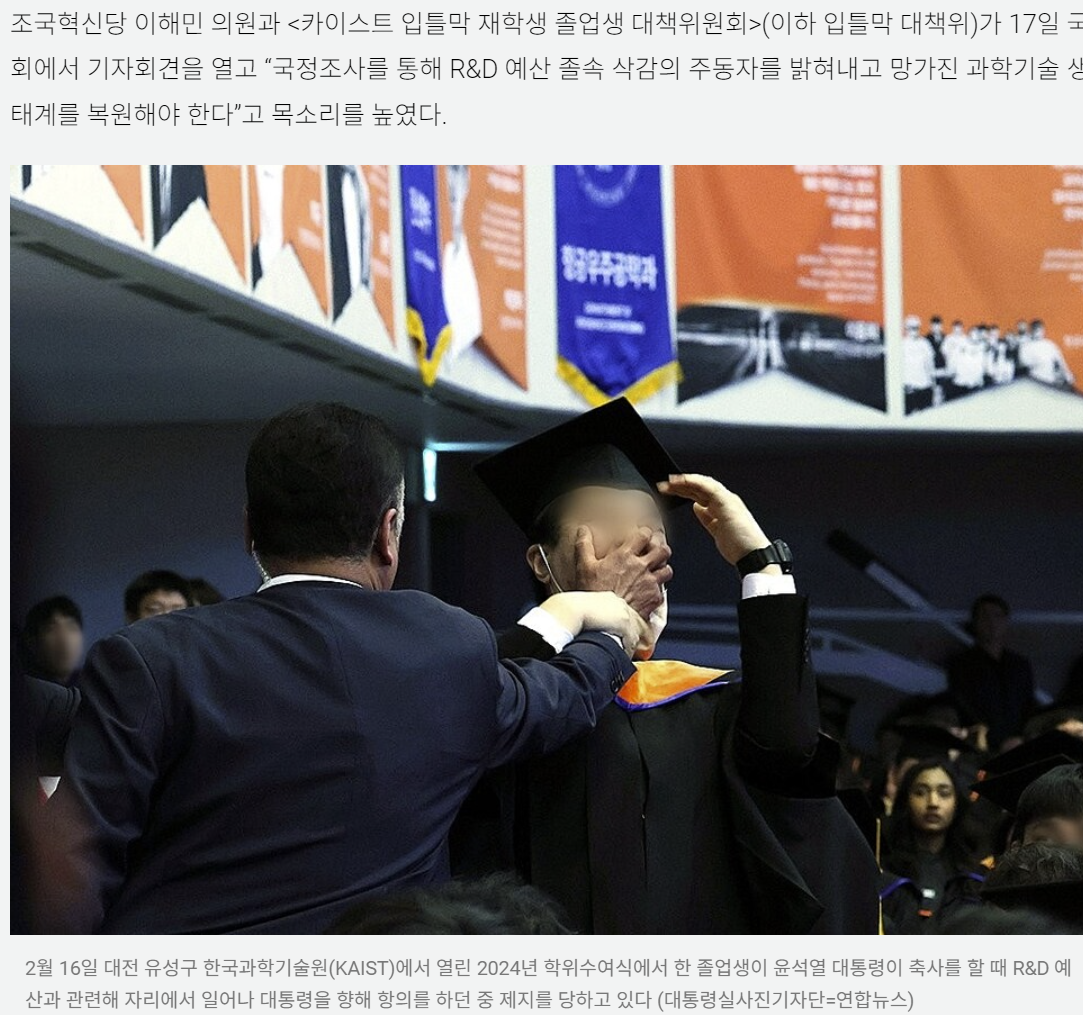

# 2. 데이터 수집 출처
* 과학기술혁신성과지표 데이터
 - KISTEP COSTII 데이터 다운로드 - (국가 통계 포털에 공개되고있음)
* GDP 대비 연구개발비율 데이터
 - OECD MAIN SCIENCE AND TECHNOLOGY INDICATORS (Sep. 2023)
* 예산 기금 데이터
 - 과학기술정보통신부 홈페이지 > 예산 페이지
* 경제장률 데이터
 - 한국은행 국민소득 GDP 다운

# 3. 전처리, 정제과정
 1) 데이터 수집: 각 출처에서 제공하는 연구개발비 데이터를 다운로드

 2)  형식 통일: 연도, 지표명 등 주요 변수의 형식을 통일

 3) 결측치 처리: 결측값을 확인하고, 필요한 경우 0으로 처리하거나 시각화 대상연도에서 제외

 4) 필요한 변수 선택: 분석에 필요한 주요 변수들(연구개발비, GDP 대비 연구개발비 비중 등)을 선택하여 데이터셋을 구성

# 4. 데이터 분석내용, 시각화


In [ ]:
# 구글 코랩에서 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib 및 관련 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import pandas as pd
from collections import Counter
import re

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

In [ ]:
#폰트 실행
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
#import
import pandas as pd
import seaborn as sns

#시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

from statsmodels.formula.api import ols


In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
# font path 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

# 4-1 연구개발투자액, R&D 혁신성과지표 데이터

In [ ]:
# 연구개발투자 및 혁신지표 데이터(엑셀파일) 로드

file_path = '/content/drive/MyDrive/content/연구개발투자와 혁신성과지표 데이터.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
sheet_names

['연구개발 투자와 혁신 성과 분석 데이터']

In [ ]:

# 연구개발투자 및 혁신지표 데이터 확인

data = pd.read_excel(file_path, sheet_name='연구개발 투자와 혁신 성과 분석 데이터')

# Display the first few rows of the data to understand its structure
data.head()


지표 단위     나라    2011    2012    2013    2014    2015    2016  \
0  인구 중 이공계 박사 비중  %     호주  0.0046  0.0049  0.0052  0.0055  0.0055  0.0057   
1  인구 중 이공계 박사 비중  %  오스트리아  0.0068  0.0072  0.0069  0.0071  0.0065  0.0070   
2  인구 중 이공계 박사 비중  %    벨기에     NaN     NaN  0.0020  0.0021     NaN  0.0022   
3  인구 중 이공계 박사 비중  %    캐나다     NaN  0.0046  0.0051  0.0047  0.0049  0.0050   
4  인구 중 이공계 박사 비중  %     칠레  0.0006  0.0006  0.0006  0.0005  0.0007  0.0007   

     2017    2018    2019    2020  2021  2022  2023  
0  0.0060  0.0060  0.0062  0.0058   NaN   NaN   NaN  
1  0.0061  0.0056  0.0066  0.0065   NaN   NaN   NaN  
2  0.0000  0.0061  0.0052  0.0064   NaN   NaN   NaN  
3  0.0051  0.0052  0.0048  0.0048   NaN   NaN   NaN  
4  0.0006  0.0007  0.0008  0.0005   NaN   NaN   NaN

In [ ]:
## 한국 미표기

##  지표별로 플롯차트 보기
def plot_indicator(data, indicator):
    indicator_data = data[data['지표'] == indicator].set_index('나라').drop(columns=['지표', '단위'])
    indicator_data.T.plot(figsize=(12, 8))
    plt.title(f'{indicator} over time')
    plt.xlabel('Year')
    plt.ylabel(data[data['지표'] == indicator]['단위'].iloc[0])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# List of indicators to plot
indicators = data['지표'].unique()

# Plot each indicator
#for indicator in indicators:
#    plot_indicator(data, indicator)


## 과학기술혁신역량 지표 분석('한국'의 위치는?)

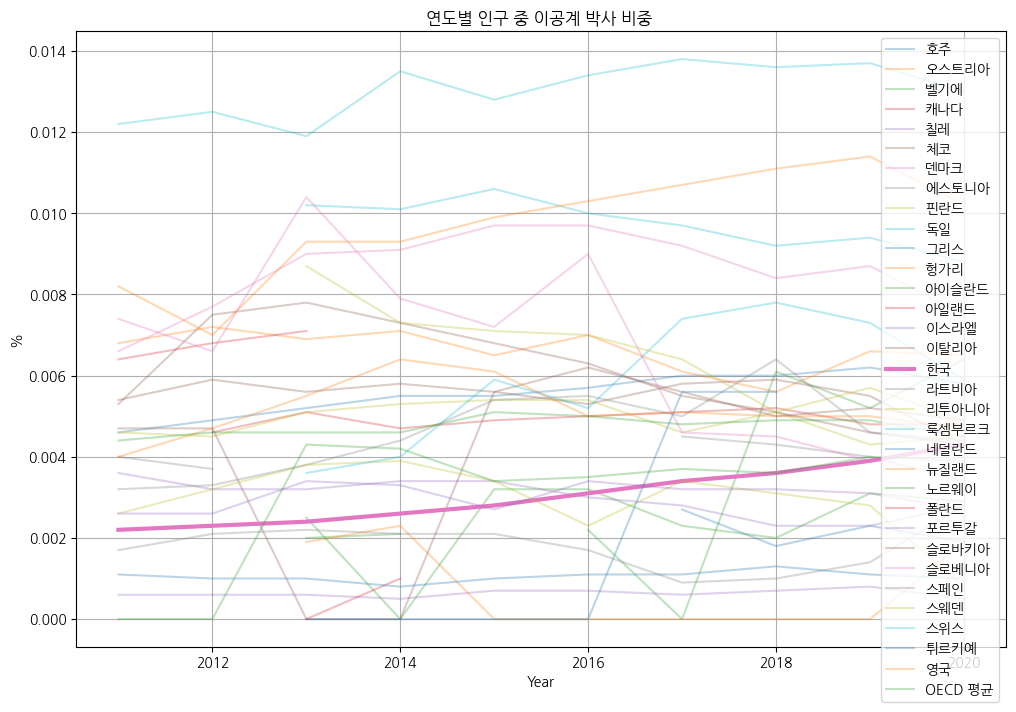

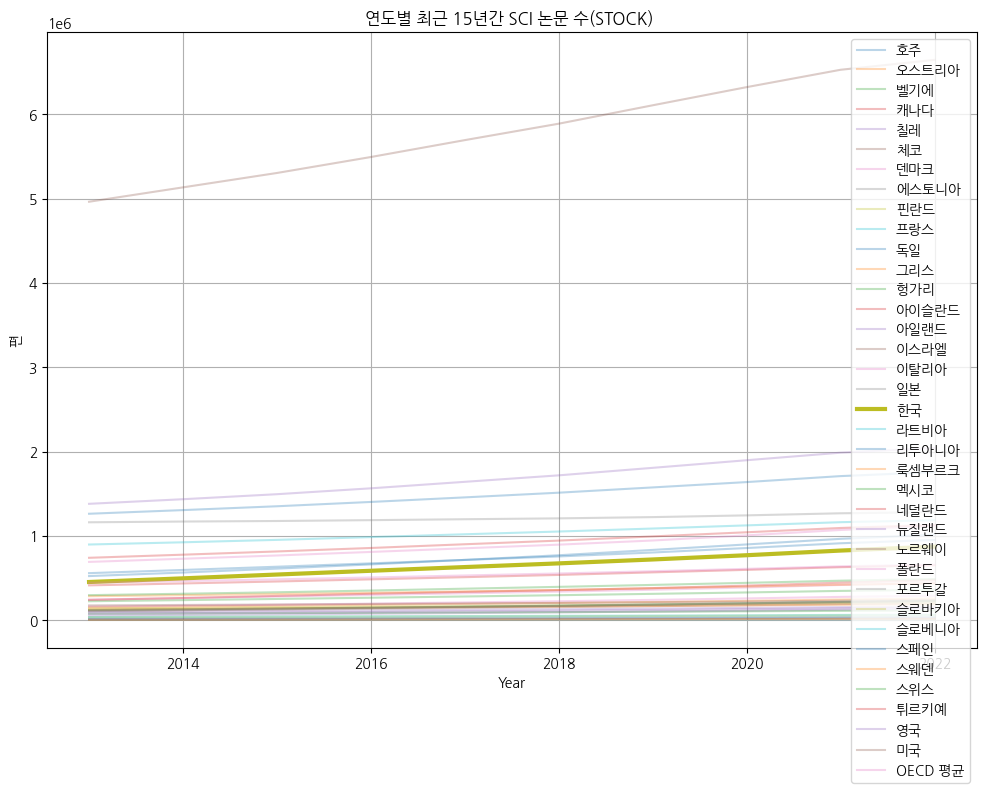

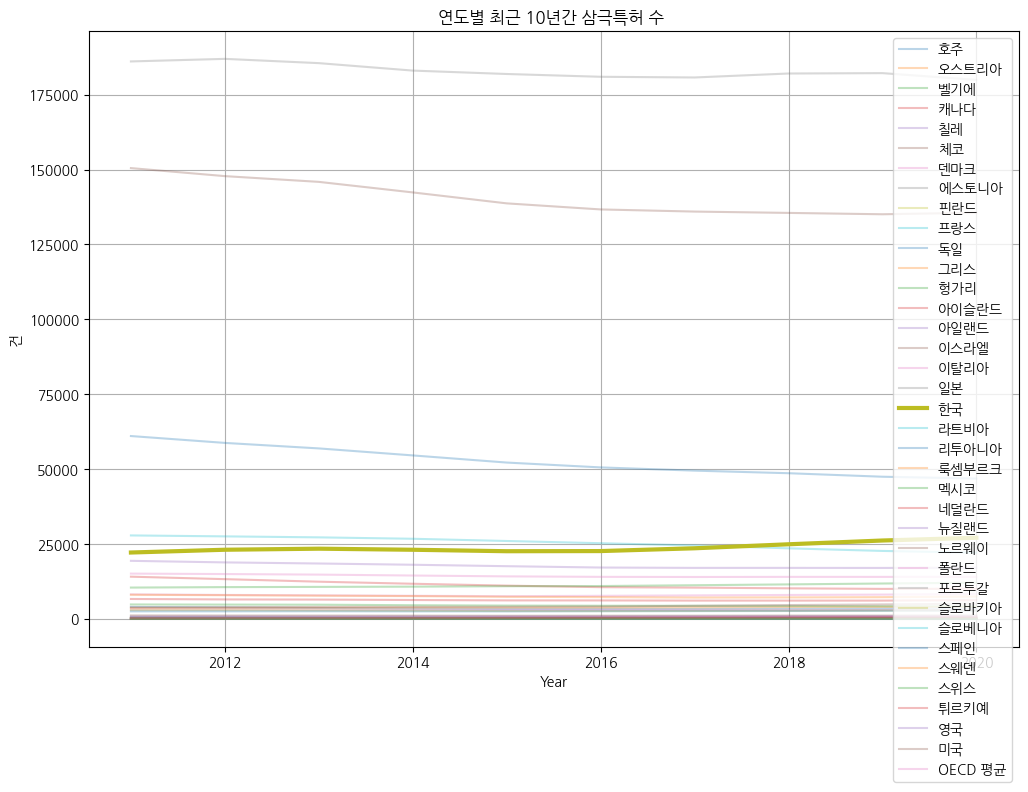

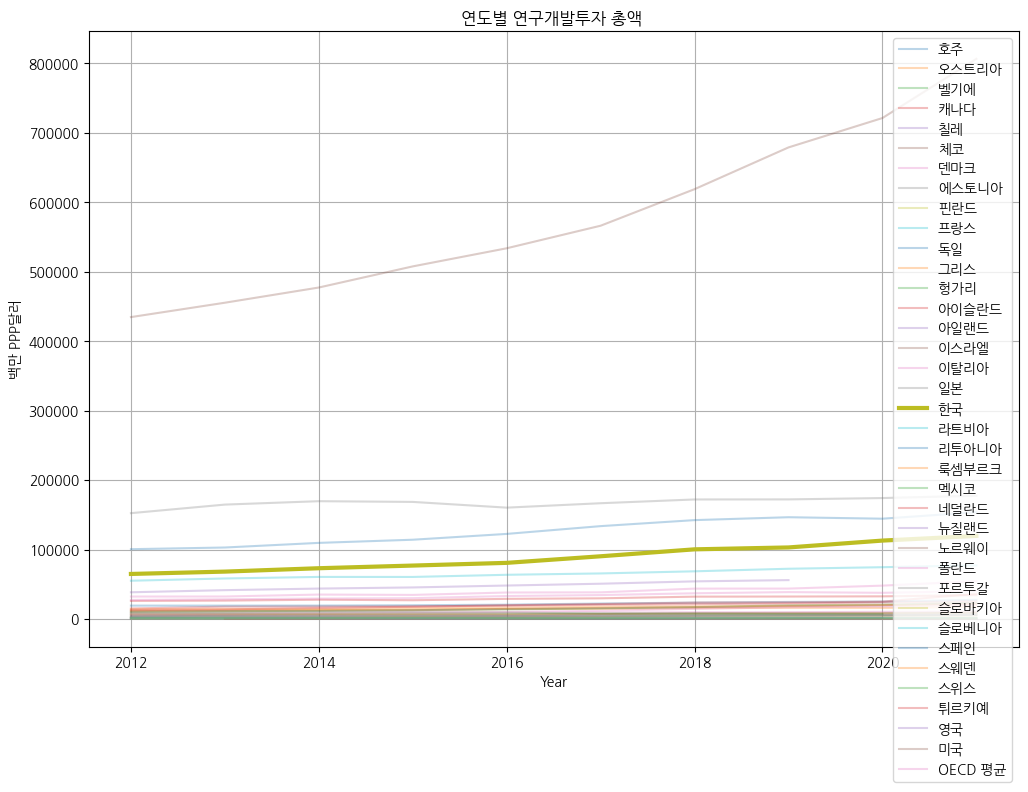

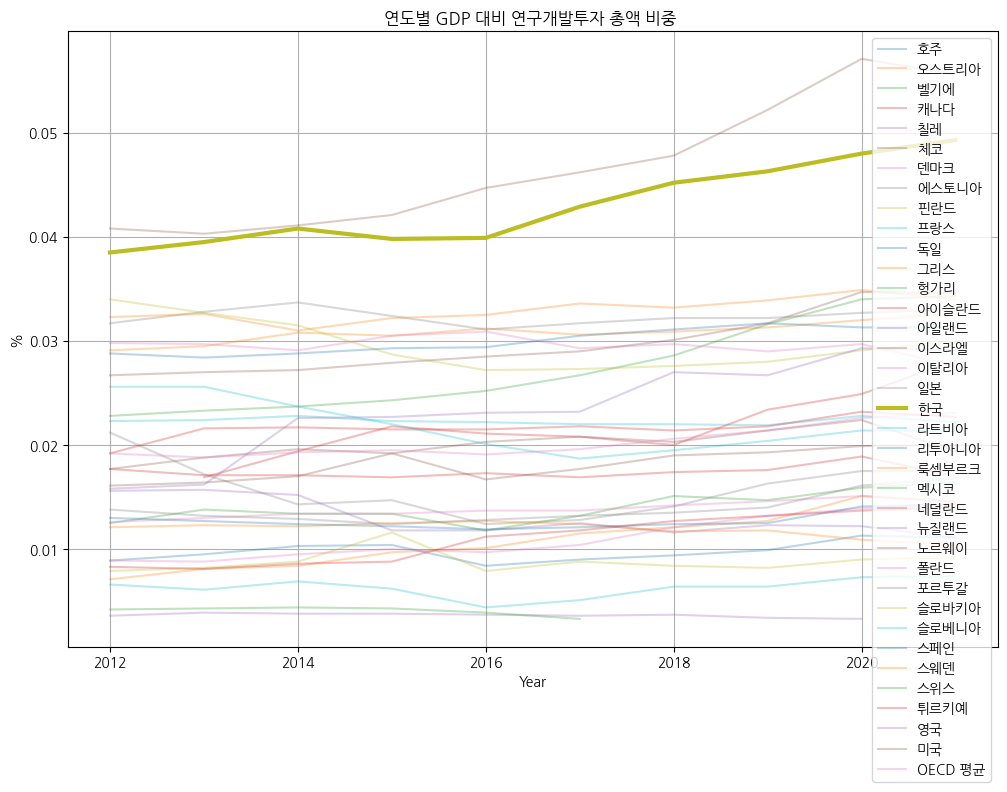

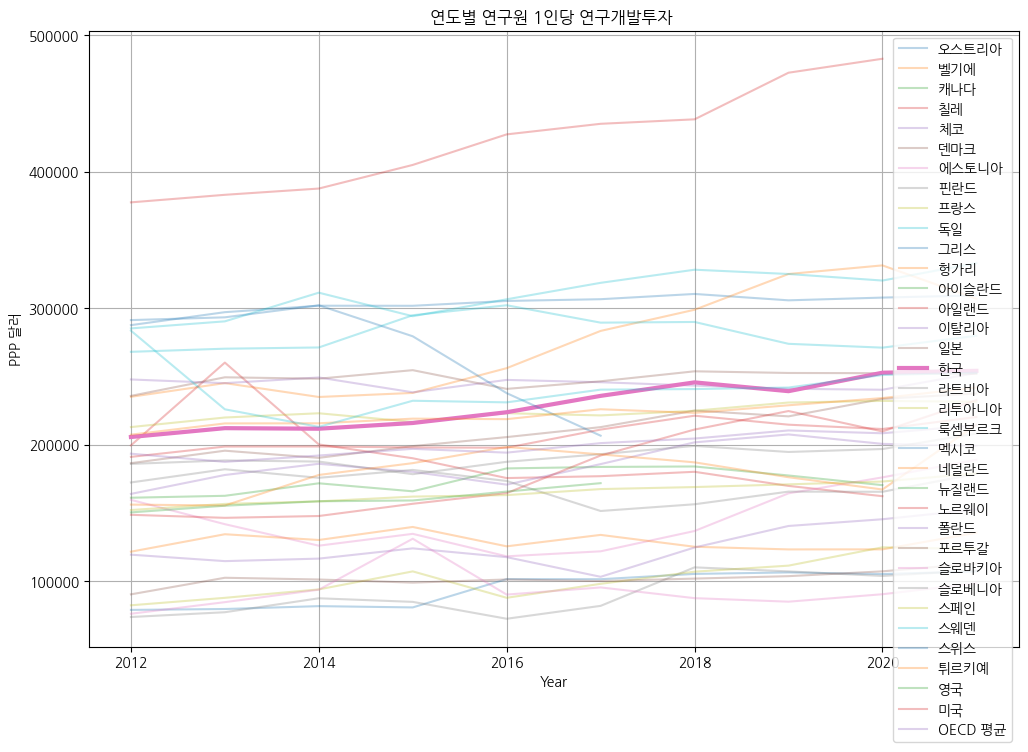

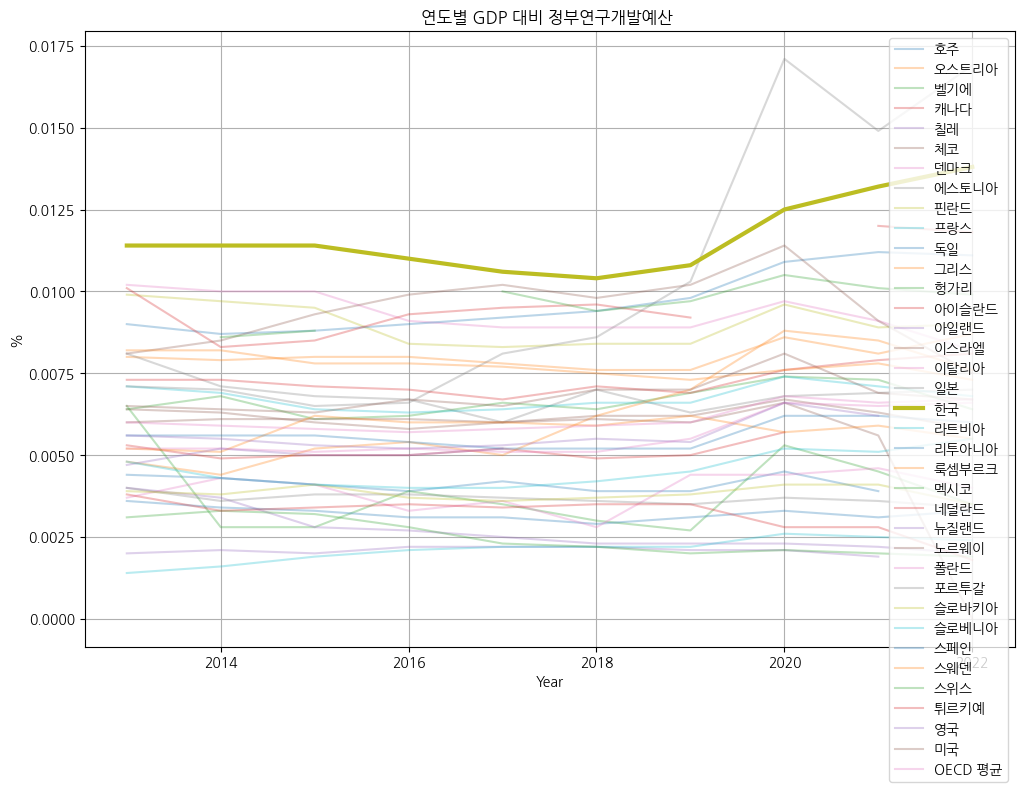

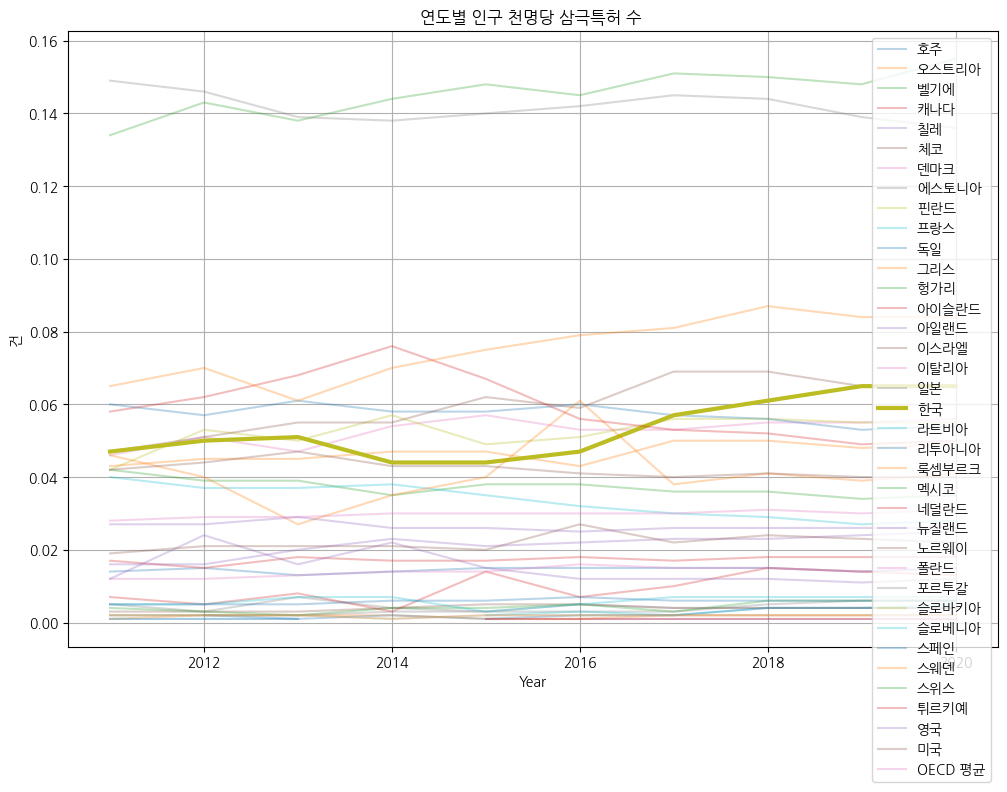

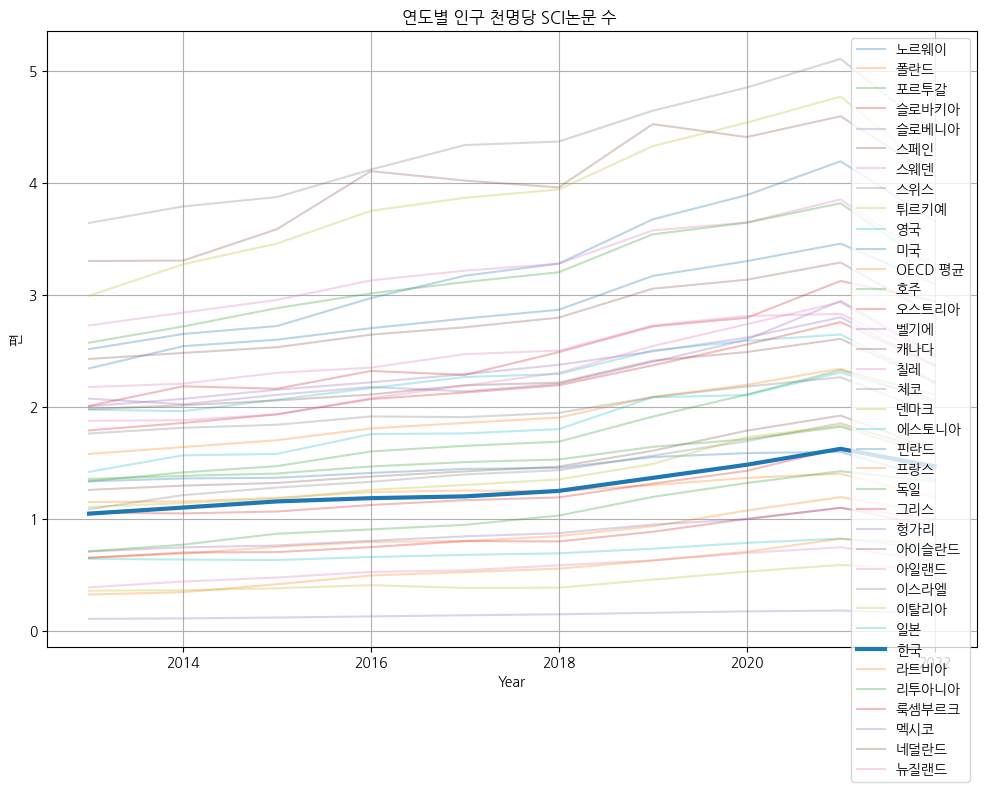

In [ ]:
## 한국 강조

south_korea_data = data[data['나라'] == '한국']

# Plot each indicator for South Korea in comparison with other countries
def plot_indicator_for_korea(data, indicator):
    indicator_data = data[data['지표'] == indicator].set_index('나라').drop(columns=['지표', '단위'])
    plt.figure(figsize=(12, 8))
    for country in indicator_data.index:
        if country == '한국':
            plt.plot(indicator_data.columns, indicator_data.loc[country], label=country, linewidth=3)
        else:
            plt.plot(indicator_data.columns, indicator_data.loc[country], label=country, alpha=0.3)
    plt.title(f'연도별 {indicator} ')
    plt.xlabel('Year')
    plt.ylabel(data[data['지표'] == indicator]['단위'].iloc[0])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


indicators = data['지표'].unique()

# Plot each indicator for South Korea
for indicator in indicators:
    plot_indicator_for_korea(data, indicator)


* 연구개발비 총액
    - 한국은 연구개발비 총액에서 상당히 높은 수준임
    -  대체적으로 많은 국가들 사이에서 상위권에 위치
    - 연구개발에 대한 투자 의지가 강함

* GDP 대비 연구개발비 비중
    - 한국은 GDP 대비 연구개발비 비중에서도 매우 높은 비율을 차지하
    - 한국이 경제 규모에 비해 연구개발에 많은 자원을 투자하고 있음
    - 혁신과 기술 발전에 대한 지속적인 노력 중.

* 연구원 1인당 연구개발비
    - 한국의 연구원 1인당 연구개발비는 꾸준히 상승
    - 연구 인력에 대한 투자가 지속적으로 증가

* SCI 논문 수
    - 최근 15년간 한국의 SCI 논문 수는  지속적으로 증가 중
    - 인구수 대비로 봤을 때는 높은 편으로 추정
    - 연구 성과가 꾸준히 향상되고 있음
    - 한국의 연구개발이 실제로 학문적 성과로 연결되고 있음

* 삼극특허 수
    - 최근 10년간 삼극특허 수 상당히 높은 편
    - 한국이 혁신적 아이디어를 실용적인 특허로 전환하는 데 있어 경쟁력이 있음

* 인구 천명당 SCI 논문 수
    - 인구 천명당 SCI 논문 수는 보통 수준

* 인구 천명당 삼극특허 수
    - 마찬가지로 인구 천명당 삼극특허 수에서도 한국은 높은 성과
    - 기술 혁신 성과 창출이 타국가 인구수 대비 매우 활발하게 이루어지고 있음

####  > 한국은 연구개발 투자와 관련된 다양한 지표에서 매우 우수한 성과를 보여주고 있음.
####  > 이는 한국의 과학기술혁신역량이 다른 국가들과 비교하여 높은 수준임을 나타내며, 지속적인 연구개발 투자와 성과가 이러한 결과를 뒷받침한다고 볼 수 있음.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


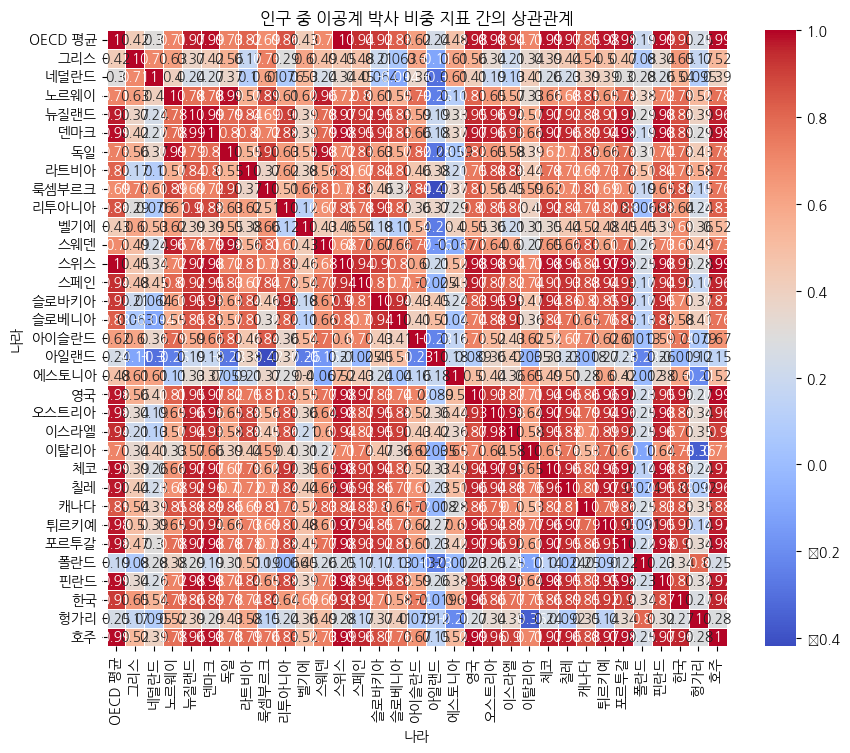

                            OLS Regression Results                            
Dep. Variable:                      값   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.787
Date:                Tue, 18 Jun 2024   Prob (F-statistic):             0.0951
Time:                        12:13:45   Log-Likelihood:                -60067.
No. Observations:                4251   AIC:                         1.201e+05
Df Residuals:                    4249   BIC:                         1.202e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.508e+06   2.74e+06     -1.645      0.1

In [ ]:

data_t = data.melt(id_vars=['지표', '단위', '나라'], var_name='연도', value_name='값')

# Handle missing values by filling them with 0
data_t = data_t.fillna(0)
indicators = data['지표'].unique()

# 지표별 상관관계 분석
def plot_correlation_matrix(data, indicator):
    indicator_data = data[data['지표'] == indicator].pivot(index='연도', columns='나라', values='값')
    corr = indicator_data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'{indicator} 지표 간의 상관관계')
    plt.show()

# 예시로 '인구 중 이공계 박사 비중' 지표의 상관관계 분석
plot_correlation_matrix(data_t, '인구 중 이공계 박사 비중')

# 연구개발 투자와 혁신성과 지표 간의 인과관계 분석
def causality_analysis(data, response_var, predictor_var):
    formula = f'{response_var} ~ {predictor_var}'
    model = ols(formula, data=data).fit()
    print(model.summary())

# 예시로 '연구개발 투자액'이 '인구 중 이공계 박사 비중'에 미치는 영향 분석
# Assuming '연구개발 투자액' and '인구 중 이공계 박사 비중' are available in the dataset
# For demonstration, I'll use '값' as the variable for analysis (replace it with actual column names when available)
response_var = '값'
predictor_var = '연도'  # This is a placeholder; replace it with the actual predictor variable
causality_analysis(data_t, response_var, predictor_var)


In [ ]:

# Load the Excel file
file_path = '/content/drive/MyDrive/content/연구개발투자와 혁신성과지표 데이터.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
xls.sheet_names

['연구개발 투자와 혁신 성과 분석 데이터']

In [ ]:
# Load the data from the sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name='연구개발 투자와 혁신 성과 분석 데이터')

# Display the first few rows of the DataFrame to understand its structure
df.head()


지표 단위     나라    2011    2012    2013    2014    2015    2016  \
0  인구 중 이공계 박사 비중  %     호주  0.0046  0.0049  0.0052  0.0055  0.0055  0.0057   
1  인구 중 이공계 박사 비중  %  오스트리아  0.0068  0.0072  0.0069  0.0071  0.0065  0.0070   
2  인구 중 이공계 박사 비중  %    벨기에     NaN     NaN  0.0020  0.0021     NaN  0.0022   
3  인구 중 이공계 박사 비중  %    캐나다     NaN  0.0046  0.0051  0.0047  0.0049  0.0050   
4  인구 중 이공계 박사 비중  %     칠레  0.0006  0.0006  0.0006  0.0005  0.0007  0.0007   

     2017    2018    2019    2020  2021  2022  2023  
0  0.0060  0.0060  0.0062  0.0058   NaN   NaN   NaN  
1  0.0061  0.0056  0.0066  0.0065   NaN   NaN   NaN  
2  0.0000  0.0061  0.0052  0.0064   NaN   NaN   NaN  
3  0.0051  0.0052  0.0048  0.0048   NaN   NaN   NaN  
4  0.0006  0.0007  0.0008  0.0005   NaN   NaN   NaN

In [ ]:
# Remove rows where the '나라' column has non-country values like 'OECD 평균'
df_final_cleaned = df_final[df_final['나라'] != 'OECD 평균']

# Check for any remaining non-numeric values in the DataFrame
df_final_cleaned = df_final_cleaned.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix_cleaned = df_final_cleaned.corr()

# Display the cleaned correlation matrix
correlation_matrix_cleaned


지표                       나라        연도  GDP 대비 연구개발투자 총액 비중  GDP 대비 정부연구개발예산  \
지표                                                                            
나라                      NaN       NaN                  NaN              NaN   
연도                      NaN  1.000000             0.123855         0.095825   
GDP 대비 연구개발투자 총액 비중     NaN  0.123855             1.000000         0.711946   
GDP 대비 정부연구개발예산         NaN  0.095825             0.711946         1.000000   
연구개발투자 총액               NaN  0.063349             0.318437         0.216198   
연구원 1인당 연구개발투자          NaN  0.099047             0.591820         0.490059   
인구 중 이공계 박사 비중          NaN  0.020070             0.353533         0.400376   
인구 천명당 SCI논문 수          NaN  0.199695             0.403162         0.478462   
인구 천명당 삼극특허 수           NaN  0.011938             0.706090         0.604797   
최근 10년간 삼극특허 수          NaN -0.010200             0.367359         0.302241   
최근 15년간 SCI 논문 수(STOCK) NaN  0.070445             0.285674         0.175541   

지표                       연구개발투자 총액  연구원 1인당 연구개발투자  인구 중 이공계 박사 비중  \
지표                                                                   
나라                             NaN             NaN             NaN   
연도                        0.063349        0.099047        0.020070   
GDP 대비 연구개발투자 총액 비중       0.318437        0.591820        0.353533   
GDP 대비 정부연구개발예산           0.216198        0.490059        0.400376   
연구개발투자 총액                 1.000000        0.593859        0.324558   
연구원 1인당 연구개발투자            0.593859        1.000000        0.461748   
인구 중 이공계 박사 비중            0.324558        0.461748        1.000000   
인구 천명당 SCI논문 수           -0.121813        0.309041        0.504997   
인구 천명당 삼극특허 수             0.283164        0.615205        0.572488   
최근 10년간 삼극특허 수            0.780453        0.492270        0.403977   
최근 15년간 SCI 논문 수(STOCK)   0.963477        0.594564        0.424398   

지표                       인구 천명당 SCI논문 수  인구 천명당 삼극특허 수  최근 10년간 삼극특허 수  \
지표                                                                       
나라                                  NaN            NaN             NaN   
연도                             0.199695       0.011938       -0.010200   
GDP 대비 연구개발투자 총액 비중            0.403162       0.706090        0.367359   
GDP 대비 정부연구개발예산                0.478462       0.604797        0.302241   
연구개발투자 총액                     -0.121813       0.283164        0.780453   
연구원 1인당 연구개발투자                 0.309041       0.615205        0.492270   
인구 중 이공계 박사 비중                 0.504997       0.572488        0.403977   
인구 천명당 SCI논문 수                 1.000000       0.370197       -0.179960   
인구 천명당 삼극특허 수                  0.370197       1.000000        0.544610   
최근 10년간 삼극특허 수                -0.179960       0.544610        1.000000   
최근 15년간 SCI 논문 수(STOCK)       -0.076629       0.185218        0.701993   

지표                       최근 15년간 SCI 논문 수(STOCK)  
지표                                                
나라                                           NaN  
연도                                      0.070445  
GDP 대비 연구개발투자 총액 비중                     0.285674  
GDP 대비 정부연구개발예산                         0.175541  
연구개발투자 총액                               0.963477  
연구원 1인당 연구개발투자                          0.594564  
인구 중 이공계 박사 비중                          0.424398  
인구 천명당 SCI논문 수                         -0.076629  
인구 천명당 삼극특허 수                           0.185218  
최근 10년간 삼극특허 수                          0.701993  
최근 15년간 SCI 논문 수(STOCK)                 1.000000

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


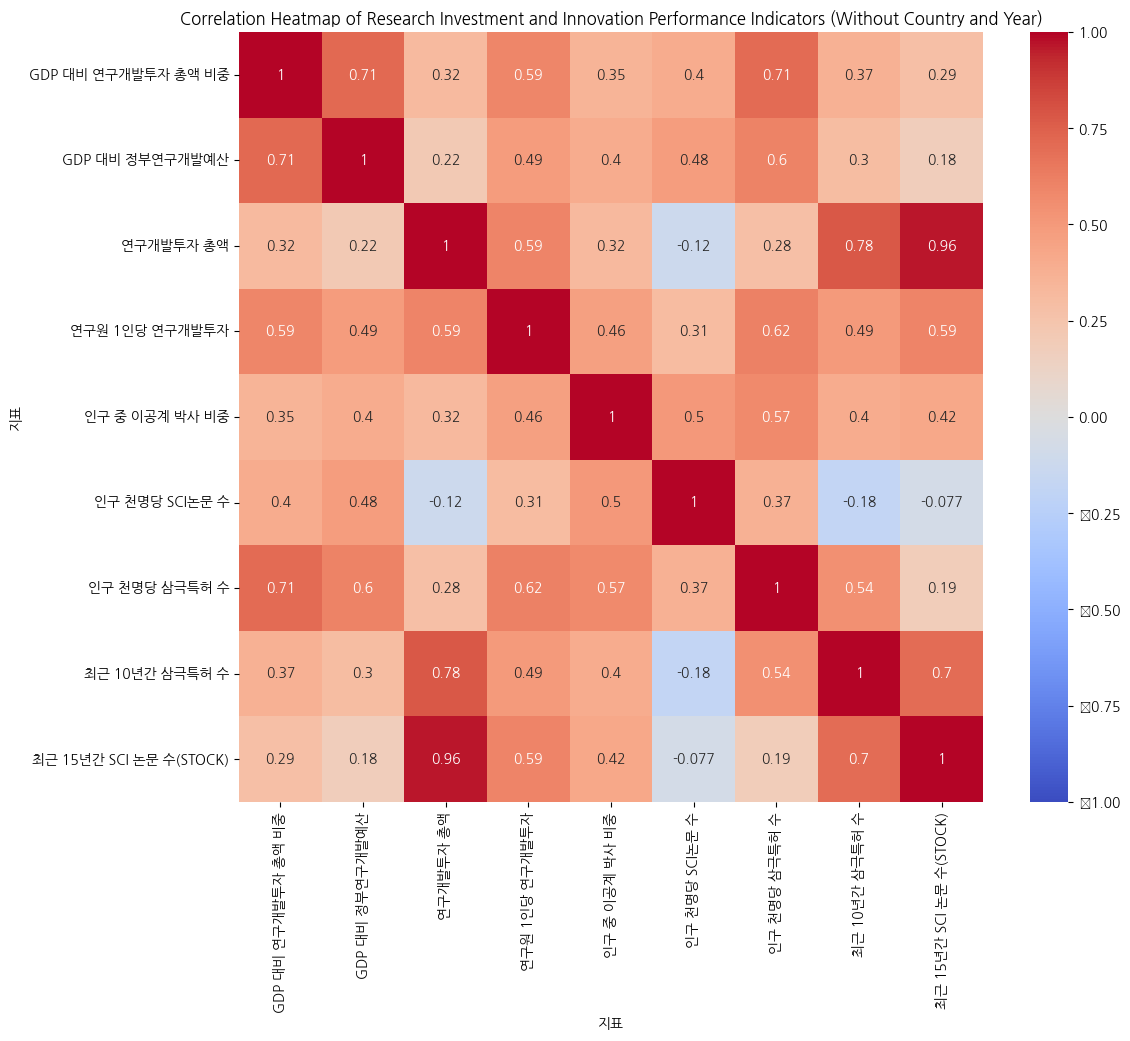

In [ ]:
# Remove '나라' and '연도' columns from the correlation matrix
correlation_matrix_cleaned_no_country_year = df_final_cleaned.drop(columns=['나라', '연도']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the cleaned correlation matrix excluding '나라' and '연도'
sns.heatmap(correlation_matrix_cleaned_no_country_year, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)

# Title and display
plt.title('Correlation Heatmap of Research Investment and Innovation Performance Indicators (Without Country and Year)')
plt.show()


### 연구개발투자액과의 주요 상관관계

* 연구개발투자 총액과 최근 15년간 SCI 논문 수(STOCK): 매우 높은 상관관계 (0.963)
* 연구개발투자 총액과 최근 10년간 삼극특허 수: 높은 상관관계 (0.780)
* 연구개발투자 총액과 연구원 1인당 연구개발투자: 높은 상관관계 (0.594)

    -> 연구개발 투자액은 최근 15년간 SCI 논문 수(STOCK),최근 10년간 삼극특허 수에 영향을 미침.

### 회귀분석
- 연구개발 투자액에대한 최근 15년간 SCI 논문 수(STOCK),최근 10년간 삼극특허 수

In [ ]:


# Extract relevant data for regression analysis
data_for_regression = df_final_cleaned[['연구개발투자 총액', '최근 15년간 SCI 논문 수(STOCK)', '최근 10년간 삼극특허 수']].dropna()

# Define independent variable (X) and dependent variables (y1 and y2)
X = data_for_regression[['연구개발투자 총액']]
y1 = data_for_regression['최근 15년간 SCI 논문 수(STOCK)']
y2 = data_for_regression['최근 10년간 삼극특허 수']

# Add constant to the independent variable (X) for statsmodels
X_with_const = sm.add_constant(X)

# Regression model for 최근 15년간 SCI 논문 수(STOCK)
model1 = sm.OLS(y1, X_with_const).fit()

# Regression model for 최근 10년간 삼극특허 수
model2 = sm.OLS(y2, X_with_const).fit()

# Summary of the regression results
summary1 = model1.summary()
summary2 = model2.summary()

summary1, summary2


(<class 'statsmodels.iolib.summary.Summary'>
 """
                                OLS Regression Results                              
 Dep. Variable:     최근 15년간 SCI 논문 수(STOCK)   R-squared:                       0.931
 Model:                                 OLS   Adj. R-squared:                  0.930
 Method:                      Least Squares   F-statistic:                     3652.
 Date:                     Tue, 18 Jun 2024   Prob (F-statistic):          1.15e-159
 Time:                             12:13:46   Log-Likelihood:                -3802.2
 No. Observations:                      274   AIC:                             7608.
 Df Residuals:                          272   BIC:                             7616.
 Df Model:                                1                                         
 Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------------------

## 최근 15년간 SCI 논문 수(STOCK)에 대한 회귀분석 결과
* R-squared: 0.931
    * 연구개발투자 총액이 최근 15년간 SCI 논문 수(STOCK)의 변동을 93.1%.
* 회귀계수 (coef): 9.3994
    * 연구개발투자 총액이 1 단위 증가할 때, 최근 15년간 SCI 논문 수(STOCK)는 약 9.3994 증가.
* p-value: 0.000
    * => 회귀계수가 통계적으로 유의미.

## 최근 10년간 삼극특허 수에 대한 회귀분석 결과
* R-squared: 0.608
연구개발투자 총액이 최근 10년간 삼극특허 수의 변동을 60.8% 설명.
회귀계수 (coef): 0.2954
연구개발투자 총액이 1 단위 증가할 때, 최근 10년간 삼극특허 수는 약 0.2954 증가.
* p-value: 0.000
   * => 회귀계수가 통계적으로 유의미.

## 요약
* 연구개발투자 총액은 최근 15년간 SCI 논문 수(STOCK)에 매우 강한 영향을 미침.
    - 해당 지표의 변동을 93.1%.
* 연구개발투자 총액은 최근 10년간 삼극특허 수에도 유의미한 영향을
    - 단 설명력은 상대적으로 높은편은 아님(60.8%)
=> 연구개발투자액이 혁신 성과 지표들에 중요한 영향을 미침.

## 국내총생산 및 경제성장률(GDP)



In [ ]:
# 한국은행 국내총생산 및 경제성장률
gdp_file_path = '/content/drive/MyDrive/content/국내총생산 및 경제성장률(GDP).xlsx'
gdp_data = pd.read_excel(gdp_file_path)

# Display the first few rows of the GDP data to understand its structure
gdp_data

Unnamed: 0      1995      1996      1997      1998      1999  \
0     국내총생산(명목GDP)  436988.8  490850.9  542001.8  537215.3  591453.0   
1  경제성장률(실질GDP성장률)       9.6       7.9       6.2      -5.1      11.5   

       2000      2001      2002      2003  ...       2014       2015  \
0  675732.6  732723.1  813225.4  868110.6  ...  1638484.8  1740776.0   
1       9.1       4.7       7.7       3.1  ...        3.2        2.9   

        2016       2017       2018       2019       2020       2021  \
0  1833026.6  1934233.9  2006974.5  2040594.3  2058466.5  2221912.9   
1        3.2        3.4        3.2        2.3       -0.7        4.6   

        2022       2023  
0  2323781.5  2401189.4  
1        2.7        1.4  

[2 rows x 30 columns]


연구개발투자 총액만 가져오기


In [ ]:
# Extract South Korea's research and development investment data
korea_rnd_data = data[(data['나라'] == '한국') & (data['지표'] == '연구개발투자 총액')]
korea_rnd_data = korea_rnd_data.drop(columns=['지표', '단위', '나라']).T
korea_rnd_data.columns = ['연구개발투자총액']
korea_rnd_data.index.name = '연도'
korea_rnd_data = korea_rnd_data.reset_index()
korea_rnd_data['연도'] = korea_rnd_data['연도'].astype(int)
korea_rnd_data


연도  연구개발투자총액
0   2011       NaN
1   2012   64862.0
2   2013   68234.0
3   2014   73100.0
4   2015   76922.0
5   2016   80816.0
6   2017   90290.0
7   2018  100283.0
8   2019  102989.0
9   2020  112868.0
10  2021  119583.0
11  2022       NaN
12  2023       NaN

실질GDP 성장률 데이터 준비


In [ ]:
# 실질 GDP 성장률
gdp_growth_data = gdp_data.T
gdp_growth_data.columns = gdp_growth_data.iloc[0]
gdp_growth_data = gdp_growth_data.drop('Unnamed: 0').reset_index()
gdp_growth_data.columns = ['연도', '명목GDP', '실질GDP성장률']
gdp_growth_data['연도'] = gdp_growth_data['연도'].astype(int)
gdp_growth_data = gdp_growth_data[['연도', '실질GDP성장률']]
gdp_growth_data


연도 실질GDP성장률
0   1995      9.6
1   1996      7.9
2   1997      6.2
3   1998     -5.1
4   1999     11.5
5   2000      9.1
6   2001      4.7
7   2002      7.7
8   2003      3.1
9   2004      5.2
10  2005      4.4
11  2006      5.2
12  2007      5.8
13  2008      3.0
14  2009      0.8
15  2010      7.0
16  2011      3.7
17  2012      2.5
18  2013      3.3
19  2014      3.2
20  2015      2.9
21  2016      3.2
22  2017      3.4
23  2018      3.2
24  2019      2.3
25  2020     -0.7
26  2021      4.6
27  2022      2.7
28  2023      1.4

두 데이터를 병합 및 시각화
* 2022년 데이터 없어서 2021년까지만 유효

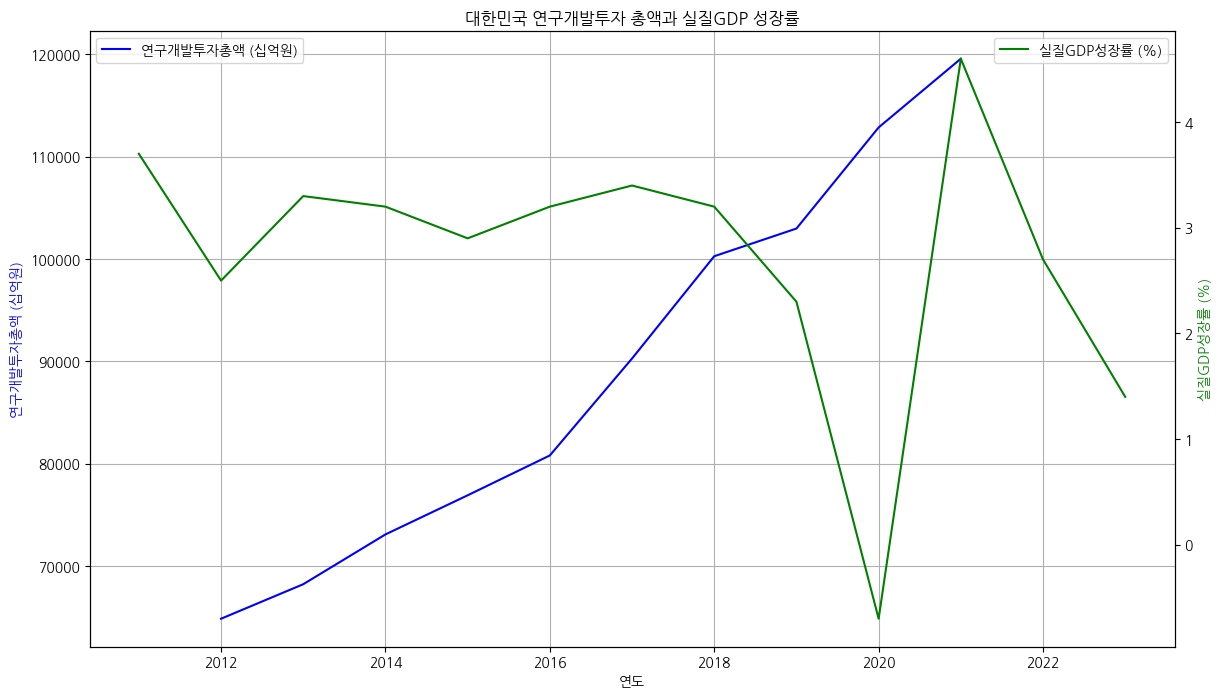

In [ ]:
# Merge the two datasets
merged_data = pd.merge(korea_rnd_data, gdp_growth_data, on='연도')

# Plot the relationship between R&D investment and GDP growth rate
plt.figure(figsize=(14, 8))
plt.plot(merged_data['연도'], merged_data['연구개발투자총액'], label='연구개발투자총액 (십억원)', color='blue')
plt.xlabel('연도')
plt.ylabel('연구개발투자총액 (십억원)', color='blue')
plt.legend(loc='upper left')
plt.grid(True)

plt.twinx()
plt.plot(merged_data['연도'], merged_data['실질GDP성장률'], label='실질GDP성장률 (%)', color='green')
plt.ylabel('실질GDP성장률 (%)', color='green')
plt.legend(loc='upper right')
plt.title('대한민국 연구개발투자 총액과 실질GDP 성장률')
plt.show()


In [ ]:
merged_data


연도  연구개발투자총액 실질GDP성장률
0   2011       NaN      3.7
1   2012   64862.0      2.5
2   2013   68234.0      3.3
3   2014   73100.0      3.2
4   2015   76922.0      2.9
5   2016   80816.0      3.2
6   2017   90290.0      3.4
7   2018  100283.0      3.2
8   2019  102989.0      2.3
9   2020  112868.0     -0.7
10  2021  119583.0      4.6
11  2022       NaN      2.7
12  2023       NaN      1.4

# 3. 분석 결과

#### 연구개발투자 총액
* 2012년부터 2021년까지 연구개발투자 총액은 지속적으로 증가해 왔습니다.
*2012년 64,862억 원에서 2021년 119,583억 원으로 약 두 배가량 증가했습니다.
*실질GDP 성장률:실질GDP 성장률은 변동이 있었습니다. 예를 들어, 2012년에는 2.5%였지만 2020년에는 COVID-19 팬데믹의 영향으로 -0.7%로 하락했습니다.
2021년에는 경제 회복으로 인해 4.6%로 증가했습니다.

#### 시각화 및 해석
* 연구개발투자 총액은 꾸준히 증가하는 추세를 보였으며, 이는 국가의 과학기술 혁신 역량 강화에 지속적인 노력을 하고 있음
* 실질GDP 성장률은 연구개발투자의 증가와 함께 어느 정도의 상관관계가 있지만, 경제 성장에는 다양한 외부 요인들도 영향을 미치기 때문에 직접적인 인과관계를 도출하기는 어려울 수 있음.
* 위 그래프는 연구개발투자 총액과 실질GDP 성장률의 변화를 시각적으로 보여줌
 이를 통해 두 변수 간의 추세를 비교.

* 파란색 선은 연구개발투자 총액(십억원 단위)을 나타내며, 시간이 지남에 따라 꾸준히 증가하는 것을 볼 수 있습니다.
* 초록색 선은 실질GDP 성장률(%)을 나타내며, 경제 상황에 따라 변동하는 모습을 보여줍니다.
이 두 변수 간의 관계를 통해 연구개발투자가 경제성장에 긍정적인 영향을 미칠 수 있음을 유추할 수 있습니다. 특히, 연구개발투자가 증가하는 동안 실질GDP 성장률이 긍정적인 변화를 보이는 경향이 있음을 알 수 있습니다.

#### (한계)
더 자세한 분석을 위해서는 연구개발투자의 특정 분야별 투자, 글로벌 경제 상황, 국내외 경제 정책 등 다양한 요인을 함께 고려 필요.다만 연구개발투자가 경제 성장에 중요한 역할을 할 수 있음을 시사하며, 지속적인 투자는 필요함

## 과기정통부 연구개발 예산데이터
2024년 연구개발비 예산 총액이 감액된 걸 들었을 때 나라 경제에 어떤 영향이 미칠까?
* 과기정통부 대표사이트에서 추출
 - 예산 메뉴 표 데이터 연도별 머지
 - 2024년 단위수부터 억원으로 바뀌어 *100 진행

In [ ]:
# Load the new Excel file containing the 2024 budget data
budget_file_path = '/content/drive/MyDrive/content/과기정통부_2022_2024예산동향_통합.xlsx'
budget_data = pd.read_excel(budget_file_path)

# Display the first few rows of the budget data to understand its structure
budget_data.head()


구분  20년예산(A)     20년추경  21년예산(B)   증감 B-A 21년예산 증감 %  21년예산(A)  \
0          총 지출  16306874  17139945  17515434  1208560   0.074114  17515434   
1           예 산  14152069  14348374  14540411   388342   0.027441  14540411   
2          일반회계   7099724   7548451   7693117   593393    0.08358   7693117   
3    소재부품장비특별회계    335854    331587    417304    81450   0.242516    417304   
4  에너지및자원사업특별회계    387551    371840    413633    26082     0.0673    413633   

      21년추경  22년예산(B) 증감 B-A.1 22년예산증감 %  22년예산(A)     22년추경  23년예산(B)  \
0  17633804  18573665  1058231  0.060417  18573665  18376390  18868606   
1  14577561  15122300   581889  0.040019  15122300  14942825  15981107   
2   7730267   8222854   529737  0.068859   8222854   8209853   8646707   
3    417304    445898    28594  0.068521    445898    445898    432230   
4    413633    429240    15607  0.037732    429240    429240    445759   

   증감 B-A.2 23년예산증감 %  23년예산(A)  24년예산(B)  증감 B-A.3  24년예산증감 %  
0  294941.0   0.01588  18868600  18562500   -306100  -0.016223  
1  858807.0  0.056791  15981100  16344300    363200   0.022727  
2  423853.0  0.051546   8646700   8116400   -530300  -0.061330  
3  -13668.0 -0.030653    432200    356000    -76200  -0.176307  
4   16519.0  0.038484    445800    387200    -58600  -0.131449

In [ ]:
# 2024 예산만 확인t
budget_2024 = budget_data[['구분', '24년예산(B)']]

# Calculate the combined values for the specified categories
general_budget = budget_2024[budget_2024['구분'] == '일반회계']['24년예산(B)'].values[0]
special_budgets = ['소재부품장비특별회계', '에너지및자원사업특별회계', '지역균형발전특별회계', '고등·평생교육지원특별회계',
                   '국립중앙과학관(책특)', '국립과천과학관(책특)', '우정사업특별회계(3개)']
special_budget_total = budget_2024[budget_2024['구분'].isin(special_budgets)]['24년예산(B)'].sum()

# Extract the subcategories for '우정사업특별회계(3개)'
post_budgets = ['우편사업특별회계', '우체국예금특별회계', '우체국보험특별회계']
post_budget_total = budget_2024[budget_2024['구분'].isin(post_budgets)]['24년예산(B)'].sum()

# Extract and calculate the combined values for '기금'
funds = ['원자력기금(연구개발계정)', '과학기술진흥기금', '정보통신진흥기금', '방송통신발전기금']
fund_total = budget_2024[budget_2024['구분'].isin(funds)]['24년예산(B)'].sum()

# Calculate the total R&D budget for 2024
total_rnd_budget_2024 = general_budget + special_budget_total + fund_total + post_budget_total

total_rnd_budget_2024


25117100

### 2024년 연구개발비 예산 총액
* 2024년 연구개발비 예산 총액: 251,171억 원( 일반회계 + 특별회계 + 기금)



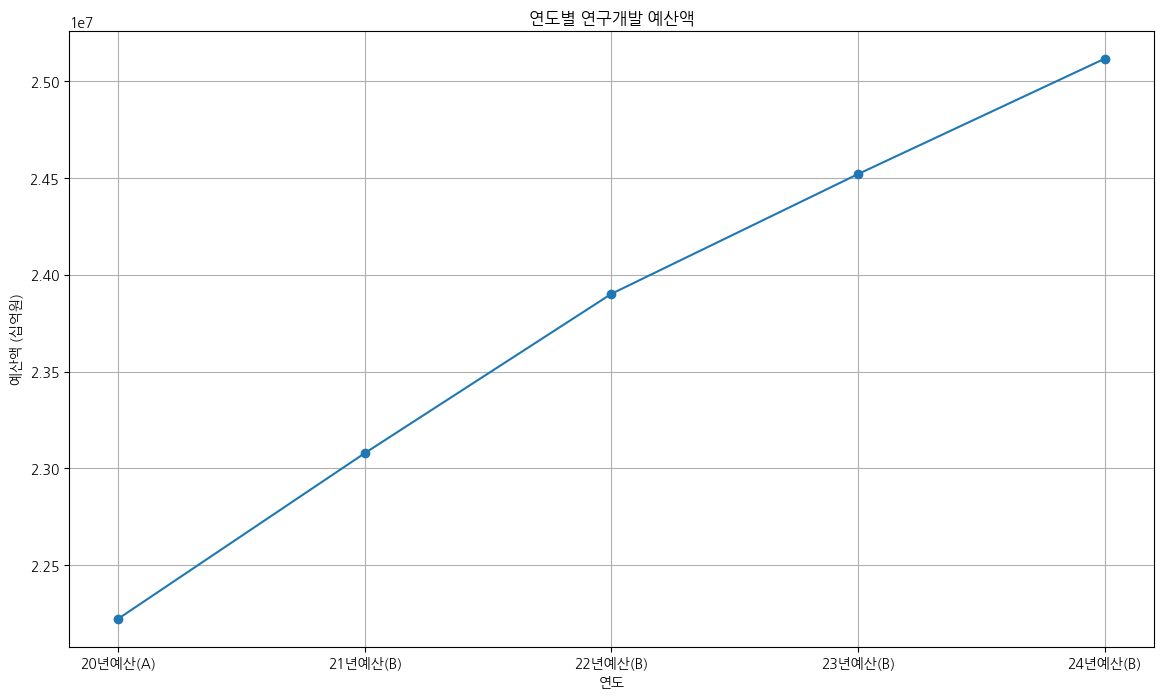

연구개발예산
20년예산(A)  22223093.0
21년예산(B)  23078850.0
22년예산(B)  23902119.0
23년예산(B)  24520905.0
24년예산(B)  25117100.0

In [ ]:
# Extract and process the data for calculation
yearly_budget_data = budget_data[['구분', '20년예산(A)', '21년예산(B)', '22년예산(B)', '23년예산(B)', '24년예산(B)']]

# Calculate the total R&D budget for each year correctly by summing only the numeric columns
def calculate_total_rnd_budget(data, year):
    general_budget = data[data['구분'] == '일반회계'][year].values[0]
    special_budgets = ['소재부품장비특별회계', '에너지및자원사업특별회계', '지역균형발전특별회계', '고등·평생교육지원특별회계',
                       '국립중앙과학관(책특)', '국립과천과학관(책특)', '우정사업특별회계(3개)']
    special_budget_total = data[data['구분'].isin(special_budgets)][year].apply(pd.to_numeric, errors='coerce').sum()

    post_budgets = ['우편사업특별회계', '우체국예금특별회계', '우체국보험특별회계']
    post_budget_total = data[data['구분'].isin(post_budgets)][year].apply(pd.to_numeric, errors='coerce').sum()

    funds = ['원자력기금(연구개발계정)', '과학기술진흥기금', '정보통신진흥기금', '방송통신발전기금']
    fund_total = data[data['구분'].isin(funds)][year].apply(pd.to_numeric, errors='coerce').sum()

    total_rnd_budget = general_budget + special_budget_total + fund_total + post_budget_total
    return total_rnd_budget

# Calculate total R&D budgets for each year
years = ['20년예산(A)', '21년예산(B)', '22년예산(B)', '23년예산(B)', '24년예산(B)']

total_rnd_budgets = {year: calculate_total_rnd_budget(yearly_budget_data, year) for year in years}

# Convert the dictionary to a DataFrame for visualization
total_rnd_budgets_df = pd.DataFrame.from_dict(total_rnd_budgets, orient='index', columns=['연구개발예산'])

# Plot the yearly R&D budgets
plt.figure(figsize=(14, 8))
plt.plot(total_rnd_budgets_df.index, total_rnd_budgets_df['연구개발예산'], marker='o')
plt.title('연도별 연구개발 예산액')
plt.xlabel('연도')
plt.ylabel('예산액 (십억원)')
plt.grid(True)
plt.show()

total_rnd_budgets_df


* 2020년 예산: 22,223,093억원
* 2021년 예산: 23,078,850억원
* 2022년 예산: 23,902,119억원
* 2023년 예산: 24,520,905억원
* 2024년 예산: 25,117,100억원

->  COVID-19 팬데믹이 본격화된 2020년 이후, 연구개발 예산이 팬데믹 시기에도 지속적으로 증가했음

연구개발 예산이 경제성장률에 미친 영향을 분석해보면, 연구개발 예산이 증가함에 따라 경제성장률 또한 긍정적인 영향을 받을 수 있습니다. 이는 주로 다음과 같은 이유 때문입니다:


* 기술 혁신 촉진: 연구개발 투자 증가로 새로운 기술과 제품이 개발되고, 이는 생산성과 효율성을 높여 경제성장에 기여할 수 있습니다.
* 산업 경쟁력 강화: R&D 투자가 산업 전반의 경쟁력을 높여 글로벌 시장에서의 입지를 강화시킬 수 있습니다.
* 일자리 창출: 연구개발 부문에서 고용이 증가함에 따라 경제 전반에 긍정적인 영향을 미칠 수 있습니다.


=> COVID-19 시기에도 연구개발 예산이 증가한 것은 경제 회복과 성장을 위한 중요한 전략이었음을 알 수 있습니다. 연구개발 투자가 지속적으로 이루어지면 장기적으로 경제 성장률을 높이는 데 긍정적인 영향을 미칠 수 있음

### 예산세부사업 데이터 분석

* 부처별 전문위원회 구분 세부사업 정보
    - 어느 부처의 예산이 가장 많이 감소되었는지

In [ ]:
# Load the new Excel file containing the budget project information from 2022 to 2024
project_file_path = '/content/drive/MyDrive/content/예산사업정보_2022-2024.xlsx'
project_data = pd.read_excel(project_file_path)

# Display the first few rows of the project data to understand its structure
project_data.head()


연도  회계구분   회계명 전문위원회    부처명                             세부사업명  \
0  2024  일반회계  일반회계   NaN  해양수산부  (다부처)CBM+기반기술적용하이브리드엔진시스템개발(R&D)   
1  2024  일반회계  일반회계   NaN  해양수산부     (다부처)암호화사이버위협대응기술연구개발및실증(R&D)   
2  2024  일반회계  일반회계   NaN  해양수산부                  (비총액)국립수산과학원기본경비   
3  2024  일반회계  일반회계   NaN  해양수산부                 (총액)국립수산과학원공익요원경비   
4  2024  일반회계  일반회계   NaN  해양수산부                   (총액)국립수산과학원기본경비   

   국회확정액(단위: 원) 예타정보  
0    1080000000    N  
1     500000000    N  
2    1079000000    N  
3      13000000    N  
4    3610000000    N

<Figure size 1400x1000 with 0 Axes>

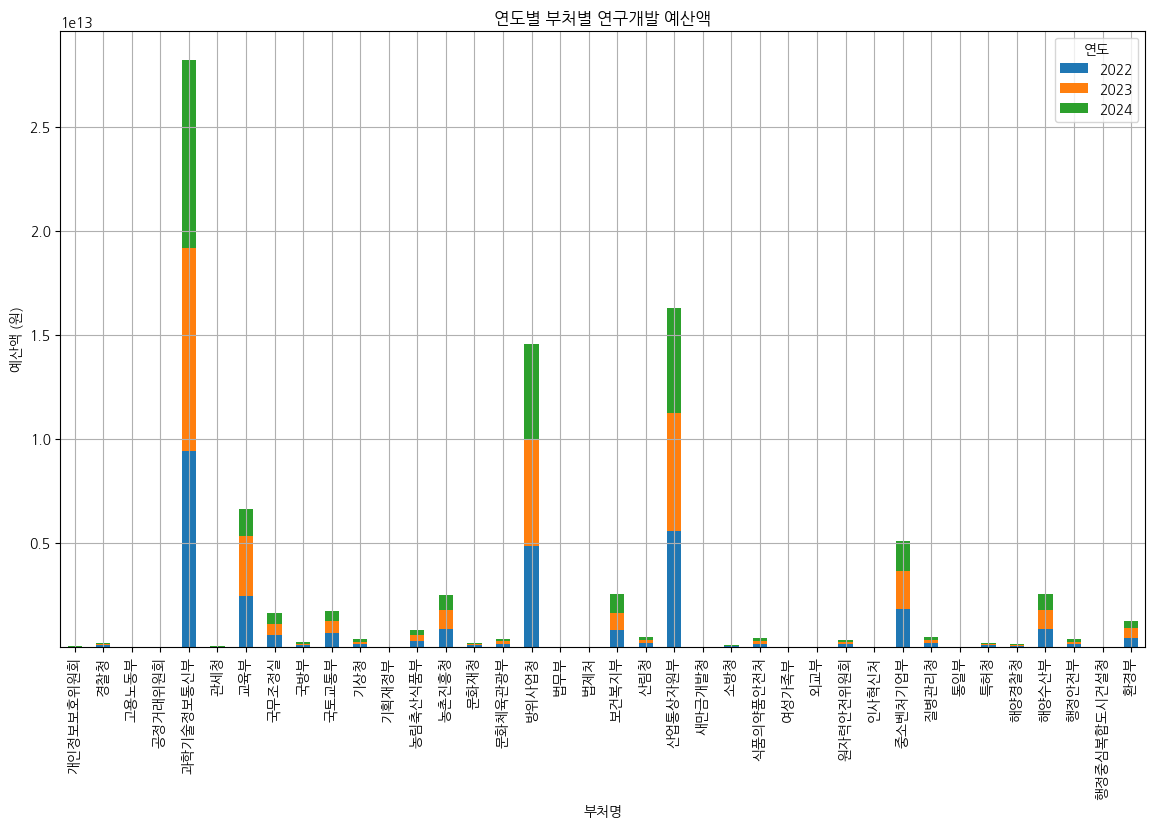

('교육부', -1593520844398.0)

In [ ]:
# Extract relevant columns and filter data for years 2022, 2023, and 2024
budget_data_filtered = project_data[['연도', '부처명', '국회확정액(단위: 원)']]
budget_data_filtered = budget_data_filtered[budget_data_filtered['연도'].isin([2022, 2023, 2024])]

# Group by year and department, and sum the budget for each department per year
budget_summary = budget_data_filtered.groupby(['연도', '부처명']).sum().reset_index()

# Pivot the data to have years as columns
budget_pivot = budget_summary.pivot(index='부처명', columns='연도', values='국회확정액(단위: 원)').fillna(0)

# Add a column to calculate the change from 2023 to 2024
budget_pivot['변동액'] = budget_pivot[2024] - budget_pivot[2023]

# Plot the budget data
plt.figure(figsize=(14, 10))
budget_pivot[[2022, 2023, 2024]].plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('연도별 부처별 연구개발 예산액')
plt.xlabel('부처명')
plt.ylabel('예산액 (원)')
plt.legend(title='연도')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

# Identify the department with the largest decrease in budget from 2023 to 2024
largest_decrease_department = budget_pivot['변동액'].idxmin()
largest_decrease_value = budget_pivot['변동액'].min()

largest_decrease_department, largest_decrease_value


## 2022년부터 2024년까지 각 부처별 연구개발 예산액 시각화

* 2024년 가장 많이 감소된 부처: 교육부
     - 감소한 예산액은 -1,593,520,844,398원

    => 이 결과는 교육부의 연구개발 예산이 2023년에 비해 2024년에 상당히 많이 감소했음, 부처들 중에서는 최고.

* 예산 감소는 경제 성장의 저해 요소로 작용할 수 있음
* 특히, 교육부의 예산 감소는 인재 양성 및 교육 연구 부문의 축소로 우려.
* 이는 장기적으로 국가 경쟁력에 부정적인 영향을 미칠 수 있음

## 키워드분석
- 세부사업명과 사업비 기준으로

In [ ]:
from collections import Counter
import re
from wordcloud import WordCloud

<ipython-input-96-3fd007ec9abe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_names['processed'] = project_names['세부사업명'].apply(lambda x: re.sub(r'\W+', ' ', x))


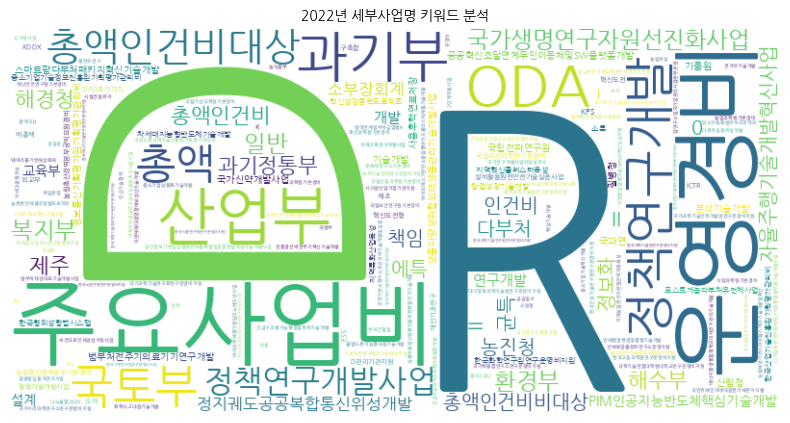

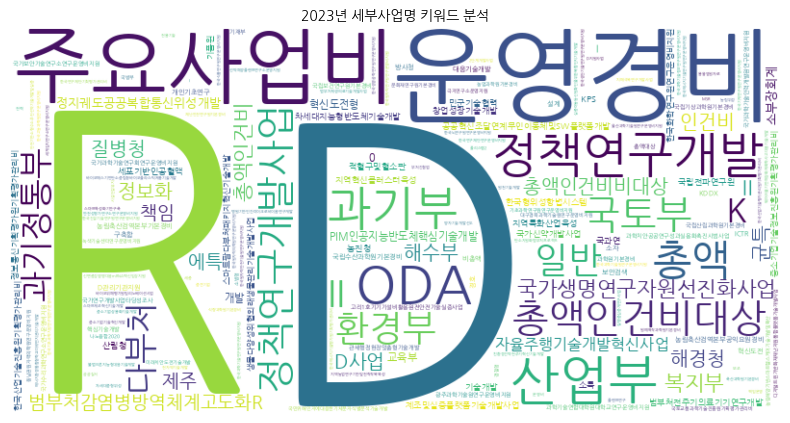

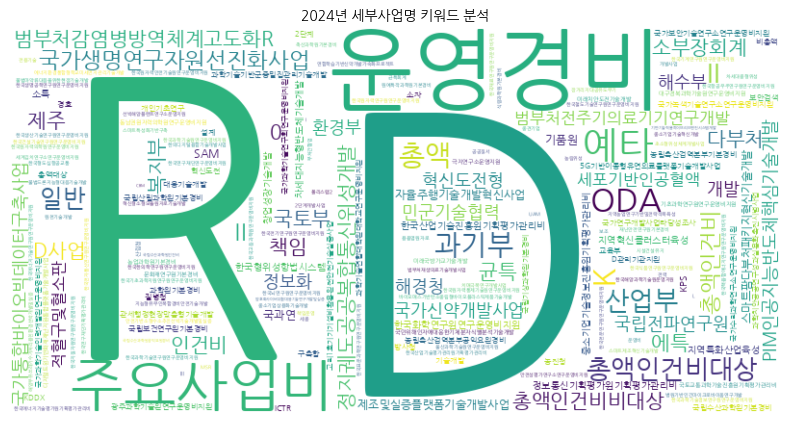

다부처  수열냉난방및재생열하이브리드시스템기술개발  비총액  국립수산과학원기본경비  초  소형위성체계개발사업    R    D  \
2022    4                      1    2            2  1           1  216  219   
2023    5                      1    2            2  1           1  264  266   
2024    4                      0    2            2  0           0  323  325   

      해경청  총액  ...  해양탄소재순환가치사슬실현을위한해상메탄올생산및운송기술개발  해저공간창출및활용기술개발  \
2022    5   8  ...                               0              0   
2023    4   8  ...                               0              0   
2024    3   8  ...                               1              1   

      핵심전략산업대응탄성소재재도약  혁신의료제품규제과학기술개발및규제지원  혁신형융복합바이오의료제품기술개발및실증  \
2022                0                    0                     0   
2023                0                    0                     0   
2024                1                    1                     1   

      현장수요대응원전첨단제조기술및부품  장비기술개발  협력거점형국토교통국제협력연구개발사업  협력융합과학기술사업화촉진지원  \
2022                  0       0                    0                0   
2023                  0       0                    0                0   
2024                  1       1                    1                1   

      화합물전력반도체고도화기술개발  
2022                0  
2023                0  
2024                1  

[3 rows x 2082 columns]

In [ ]:


# Extract the detailed project names
project_names = project_data[['연도', '세부사업명']]

# Preprocess the text data by removing special characters and splitting by space
project_names['processed'] = project_names['세부사업명'].apply(lambda x: re.sub(r'\W+', ' ', x))

# Function to generate word frequency count for each year
def get_word_frequency(year):
    texts = project_names[project_names['연도'] == year]['processed'].str.cat(sep=' ')
    words = texts.split()
    word_freq = Counter(words)
    return word_freq

# Get word frequency for each year
word_freq_2022 = get_word_frequency(2022)
word_freq_2023 = get_word_frequency(2023)
word_freq_2024 = get_word_frequency(2024)

# Combine word frequencies into a DataFrame for easier comparison
word_freq_df = pd.DataFrame([word_freq_2022, word_freq_2023, word_freq_2024], index=[2022, 2023, 2024]).fillna(0).astype(int)

# Plot word clouds for each year
def plot_wordcloud(word_freq, year):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{year}년 세부사업명 키워드 분석', fontproperties=fm.FontProperties(fname=font_path))
    plt.axis('off')
    plt.show()

# Plot word clouds for 2022, 2023, and 2024
plot_wordcloud(word_freq_2022, 2022)
plot_wordcloud(word_freq_2023, 2023)
plot_wordcloud(word_freq_2024, 2024)

word_freq_df.head()


## 사업명에 공통 키워드 제외해서 워드클라우드 구성

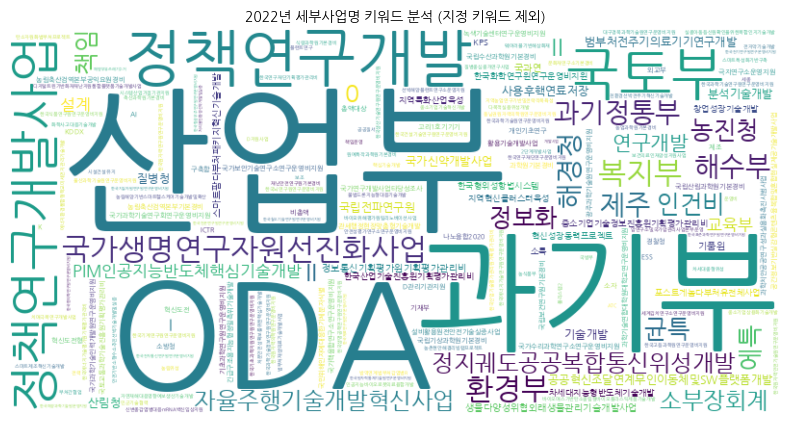

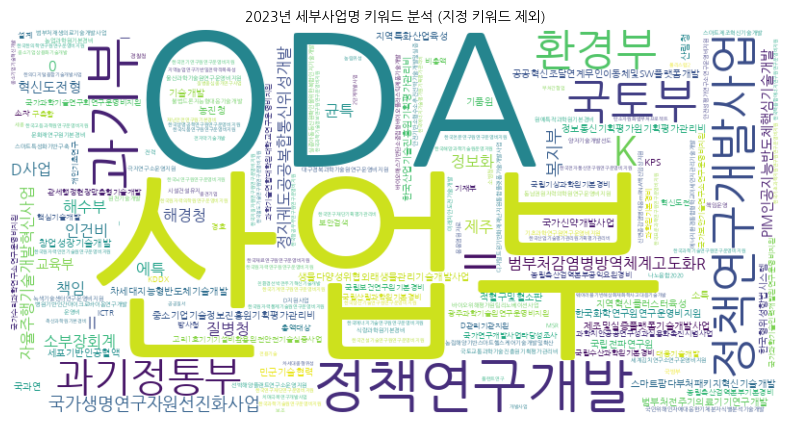

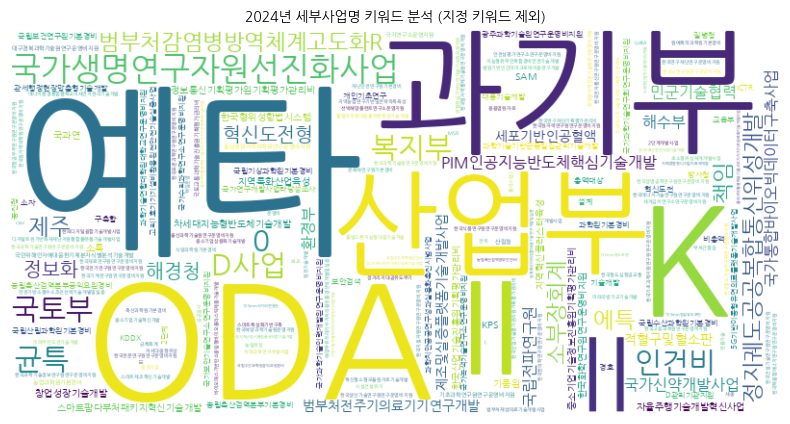

수열냉난방및재생열하이브리드시스템기술개발  비총액  국립수산과학원기본경비  초  소형위성체계개발사업  해경청  \
2022                      1    2            2  1           1    5   
2023                      1    2            2  1           1    4   
2024                      0    2            2  0           0    3   

      국립수산과학원공익요원경비  국립수산과학원인건비  농림축산검역본부공익요원경비  농림축산검역본부기본경비  ...  \
2022              1           1               2             2  ...   
2023              1           1               2             2  ...   
2024              1           1               2             2  ...   

      해양탄소재순환가치사슬실현을위한해상메탄올생산및운송기술개발  해저공간창출및활용기술개발  핵심전략산업대응탄성소재재도약  \
2022                               0              0                0   
2023                               0              0                0   
2024                               1              1                1   

      혁신의료제품규제과학기술개발및규제지원  혁신형융복합바이오의료제품기술개발및실증  현장수요대응원전첨단제조기술및부품  장비기술개발  \
2022                    0                     0                  0       0   
2023                    0                     0                  0       0   
2024                    1                     1                  1       1   

      협력거점형국토교통국제협력연구개발사업  협력융합과학기술사업화촉진지원  화합물전력반도체고도화기술개발  
2022                    0                0                0  
2023                    0                0                0  
2024                    1                1                1  

[3 rows x 2069 columns]

In [ ]:
# 공통 키워드 제거
exclude_keywords = ['R&D','R','D', '개발', '기술', '사업', '지원', '시스템', '다부처','주요사업비','운영경비','총액','총액인건비','총액인건비대상','총액인건비비대상','일반']

# 키워드 빈도수 추출
def get_word_frequency_excluding_keywords(year):
    texts = project_names[project_names['연도'] == year]['processed'].str.cat(sep=' ')
    words = texts.split()
    words = [word for word in words if word not in exclude_keywords]
    word_freq = Counter(words)
    return word_freq

# Get word frequency for each year excluding specified keywords
word_freq_2022_excl_keywords = get_word_frequency_excluding_keywords(2022)
word_freq_2023_excl_keywords = get_word_frequency_excluding_keywords(2023)
word_freq_2024_excl_keywords = get_word_frequency_excluding_keywords(2024)

# Combine word frequencies into a DataFrame for easier comparison
word_freq_df_excl_keywords = pd.DataFrame([word_freq_2022_excl_keywords, word_freq_2023_excl_keywords, word_freq_2024_excl_keywords], index=[2022, 2023, 2024]).fillna(0).astype(int)

# 워드클라우드 플롯차트 구성
def plot_wordcloud_excluding_keywords(word_freq, year):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{year}년 세부사업명 키워드 분석 (지정 키워드 제외)', fontproperties=fm.FontProperties(fname=font_path))
    plt.axis('off')
    plt.show()

# 2022, 2023, 2024년도 워드클라우드
plot_wordcloud_excluding_keywords(word_freq_2022_excl_keywords, 2022)
plot_wordcloud_excluding_keywords(word_freq_2023_excl_keywords, 2023)
plot_wordcloud_excluding_keywords(word_freq_2024_excl_keywords, 2024)

word_freq_df_excl_keywords.head()


키워드 분석 및 시각화 결과
2022년:

주요 키워드: 수열냉난방, 재생열, 하이브리드, 시스템, 소형위성체계개발, 국립수산과학원, 해경청, 총액
2023년:

주요 키워드: 수열냉난방, 재생열, 하이브리드, 시스템, 소형위성체계개발, 국립수산과학원, 해경청, 총액
2024년:

주요 키워드: 수열냉난방, 재생열, 하이브리드, 해양탄소재순환, 핵심전략산업대응, 혁신의료제품규제과학, 혁신형융복합바이오, 현장수요대응원전첨단제조, 장비기술개발, 협력거점형국토교통, 협력융합과학기술, 화합물전력반도체
이 키워드 분석을 통해 특정 연도에 어떤 연구개발 주제가 주목받았는지 확인할 수 있습니다. 예를 들어, 2024년에는 해양탄소재순환, 핵심전략산업대응, 혁신의료제품규제과학 등 새로운 키워드가 등장했습니다.

결론
지정된 공통 키워드를 제외하고 키워드 분석을 수행한 결과, 연도별로 주목받은 연구개발 주제를 보다 명확하게 확인할 수 있습니다. 이는 특정 시기에 어떤 연구개발 분야가 중점적으로 다뤄졌는지를 파악하는 데 도움이 됩

### 국회확정액이 `23년 대비 `24년에 낮아진 사업

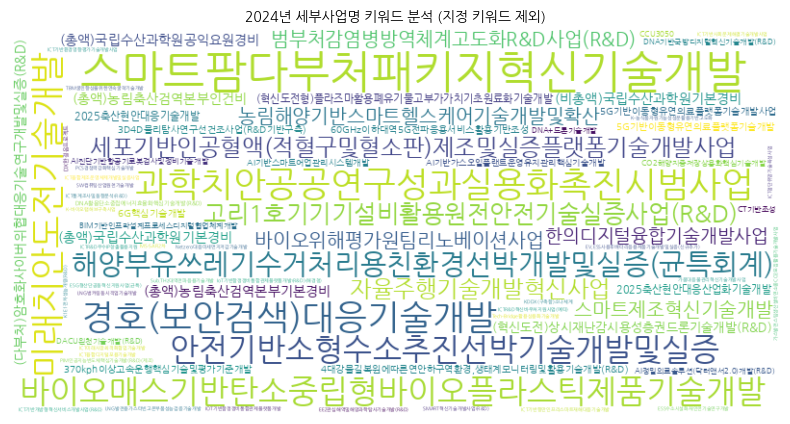

[('스마트팜다부처패키지혁신기술개발', 7),
 ('경호(보안검색)대응기술개발', 4),
 ('과학치안공공연구성과실용화촉진시범사업', 4),
 ('미래치안도전기술개발', 4),
 ('바이오매스기반탄소중립형바이오플라스틱제품기술개발', 4),
 ('안전기반소형수소추진선박기술개발및실증', 4),
 ('해양부유쓰레기수거처리용친환경선박개발및실증(균특회계)', 4),
 ('고리1호기기기설비활용원전안전기술실증사업(R&D)', 3),
 ('세포기반인공혈액(적혈구및혈소판)제조및실증플랫폼기술개발사업', 3),
 ('자율주행기술개발혁신사업', 3),
 ('농림해양기반스마트헬스케어기술개발및확산', 2),
 ('바이오위해평가원팀리노베이션사업', 2),
 ('범부처감염병방역체계고도화R&D사업(R&D)', 2),
 ('스마트제조혁신기술개발', 2),
 ('한의디지털융합기술개발사업', 2),
 ('(다부처)암호화사이버위협대응기술연구개발및실증(R&D)', 1),
 ('(비총액)국립수산과학원기본경비', 1),
 ('(총액)국립수산과학원공익요원경비', 1),
 ('(총액)국립수산과학원기본경비', 1),
 ('(총액)농림축산검역본부기본경비', 1)]

In [ ]:
#  from 2023 to 2024 예산 변화
budget_data_filtered['국회확정액(단위: 원)'] = pd.to_numeric(budget_data_filtered['국회확정액(단위: 원)'], errors='coerce')
budget_summary_2023 = budget_data_filtered[budget_data_filtered['연도'] == 2023].groupby('부처명')['국회확정액(단위: 원)'].sum()
budget_summary_2024 = budget_data_filtered[budget_data_filtered['연도'] == 2024].groupby('부처명')['국회확정액(단위: 원)'].sum()

budget_change = budget_summary_2024 - budget_summary_2023

# Identify the keywords in the project names with reduced budget
def get_keywords_with_budget_change(project_data, year1, year2):
    data_year1 = project_data[project_data['연도'] == year1]
    data_year2 = project_data[project_data['연도'] == year2]

    merged_data = data_year1.merge(data_year2, on='세부사업명', suffixes=('_'+str(year1), '_'+str(year2)))
    merged_data['예산변화'] = merged_data['국회확정액(단위: 원)_'+str(year2)] - merged_data['국회확정액(단위: 원)_'+str(year1)]

    reduced_budget_data = merged_data[merged_data['예산변화'] < 0]
    reduced_budget_keywords = ' '.join(reduced_budget_data['세부사업명']).split()
    reduced_budget_keywords = [word for word in reduced_budget_keywords if word not in exclude_keywords]

    word_freq_reduced_budget = Counter(reduced_budget_keywords)
    return word_freq_reduced_budget

# Get keywords with reduced budget from 2023 to 2024
reduced_budget_keywords_2024 = get_keywords_with_budget_change(project_data, 2023, 2024)

# Plot the word cloud for reduced budget keywords in 2024
plot_wordcloud_excluding_keywords(reduced_budget_keywords_2024, 2024)

reduced_budget_keywords_2024.most_common(20)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


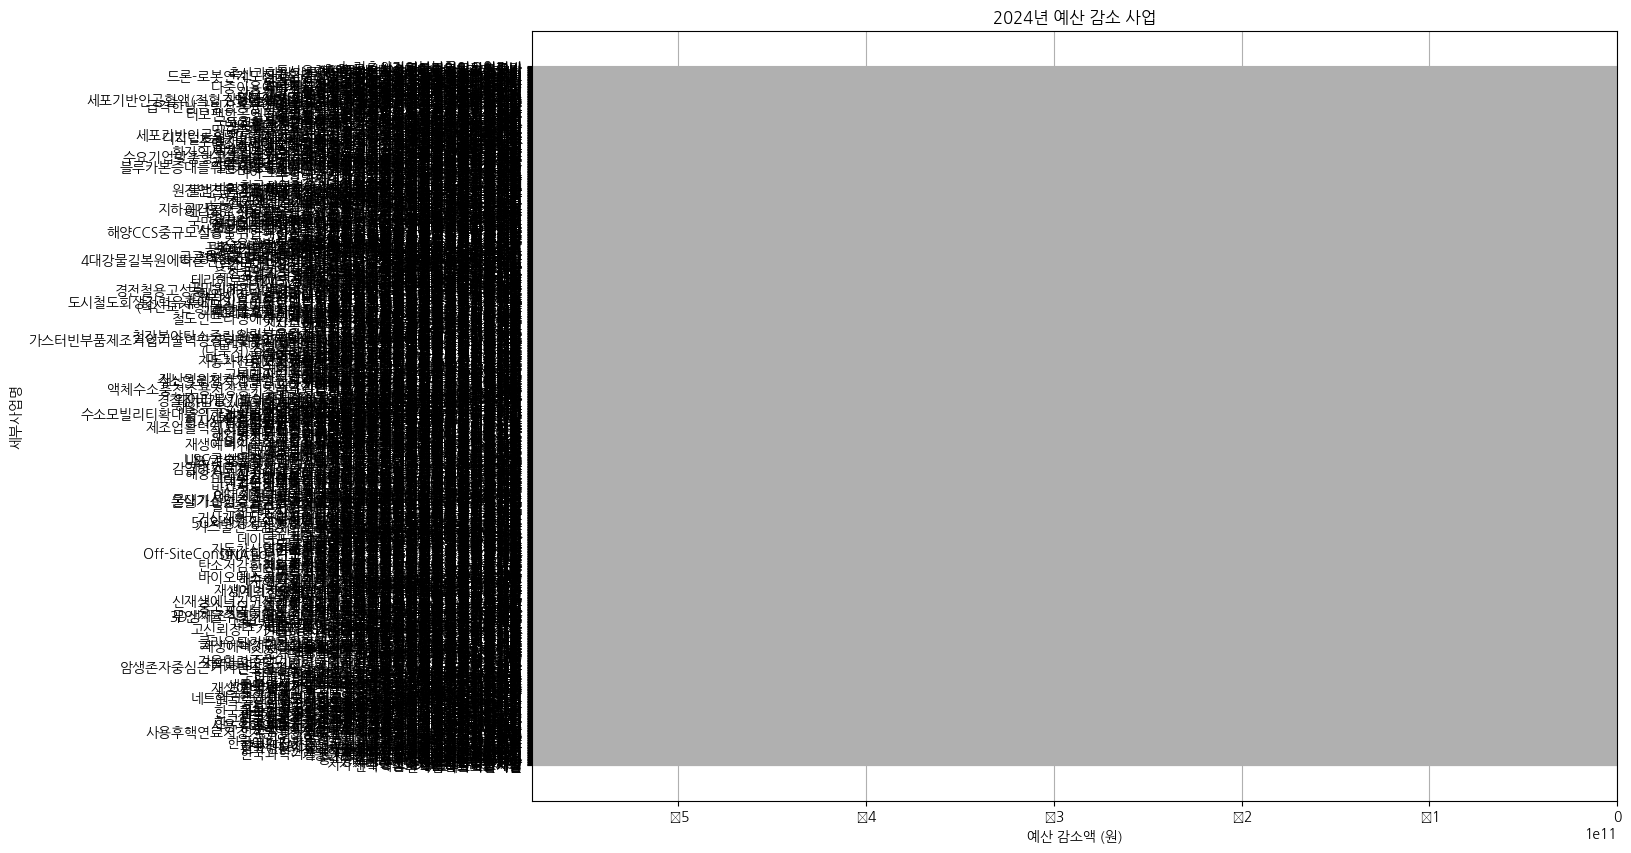

세부사업명      2023년 예산      2024년 예산        예산 감소액
445              대학혁신지원  5.504920e+11  0.000000e+00 -5.504920e+11
676           산학협력고도화지원  2.786235e+11  0.000000e+00 -2.786235e+11
43            BK21플러스사업  2.643450e+11  0.000000e+00 -2.643450e+11
1075      전략핵심소재자립화기술개발  1.864000e+11  0.000000e+00 -1.864000e+11
1201    지자체대학협력기반지역혁신사업  1.770000e+11  0.000000e+00 -1.770000e+11
1480           해성2차성능개량  1.714160e+11  0.000000e+00 -1.714160e+11
1163        중소기업상용화기술개발  2.528700e+11  9.421000e+10 -1.586600e+11
1080           전문대학혁신지원  1.555000e+11  0.000000e+00 -1.555000e+11
543         민군기술협력(방사청)  1.982310e+11  6.914200e+10 -1.290890e+11
1102       정보통신방송혁신인재양성  1.283100e+11  0.000000e+00 -1.283100e+11
513            미래도전국방기술  3.559670e+11  2.326490e+11 -1.233180e+11
1036  장거리지대공유도무기(L-SAM)  2.114550e+11  1.053480e+11 -1.061070e+11
795     스마트특성화기반구축(R&D)  1.526930e+11  7.018700e+10 -8.250600e+10
125         개별핵심기술(방사청)  3.763900e+11  2.973590e+11 -7.903100e+10
1162  중소기업기술혁신개발(소부장회계)  1.046190e+11  4.060400e+10 -6.401500e+10
730              소형무장헬기  6.215400e+10  0.000000e+00 -6.215400e+10
612           부품국산화개발지원  1.847070e+11  1.236690e+11 -6.103800e+10
1192          지역특화산업육성+  1.068860e+11  4.678700e+10 -6.009900e+10
669     산업집적지경쟁력강화(R&D)  6.306500e+10  1.712400e+10 -4.594100e+10
106   가동원전안전성향상핵심기술개발사업  4.410000e+10  0.000000e+00 -4.410000e+10

In [ ]:
# Calculate the budget change from 2023 to 2024 for each project
project_data['국회확정액(단위: 원)'] = pd.to_numeric(project_data['국회확정액(단위: 원)'], errors='coerce')
budget_2023 = project_data[project_data['연도'] == 2023][['세부사업명', '국회확정액(단위: 원)']].rename(columns={'국회확정액(단위: 원)': '2023년 예산'})
budget_2024 = project_data[project_data['연도'] == 2024][['세부사업명', '국회확정액(단위: 원)']].rename(columns={'국회확정액(단위: 원)': '2024년 예산'})

# Merge the 2023 and 2024 data
merged_budget = pd.merge(budget_2023, budget_2024, on='세부사업명', how='outer').fillna(0)
merged_budget['예산 감소액'] = merged_budget['2024년 예산'] - merged_budget['2023년 예산']

# Filter projects with reduced budget
reduced_budget_projects = merged_budget[merged_budget['예산 감소액'] < 0]

# Sort by the amount of budget reduction
reduced_budget_projects_sorted = reduced_budget_projects.sort_values(by='예산 감소액')

import matplotlib.pyplot as plt

# Plot the budget reduction for each project
plt.figure(figsize=(14, 10))
plt.barh(reduced_budget_projects_sorted['세부사업명'], reduced_budget_projects_sorted['예산 감소액'], color='red')
plt.xlabel('예산 감소액 (원)')
plt.ylabel('세부사업명')
plt.title('2024년 예산 감소 사업')
plt.grid(True)
plt.show()

# Display the top reduced projects with the reduction amount
top_reduced_projects = reduced_budget_projects_sorted[['세부사업명', '2023년 예산', '2024년 예산', '예산 감소액']]
top_reduced_projects.head(20)


### 감소액이 가장 많은 사업 분야
- 주로 교육, 소재, 군사, 방위 분야의 영향이 큼을 확인할 수 잇음.


<ipython-input-100-ec8f49e6bebc>:26: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


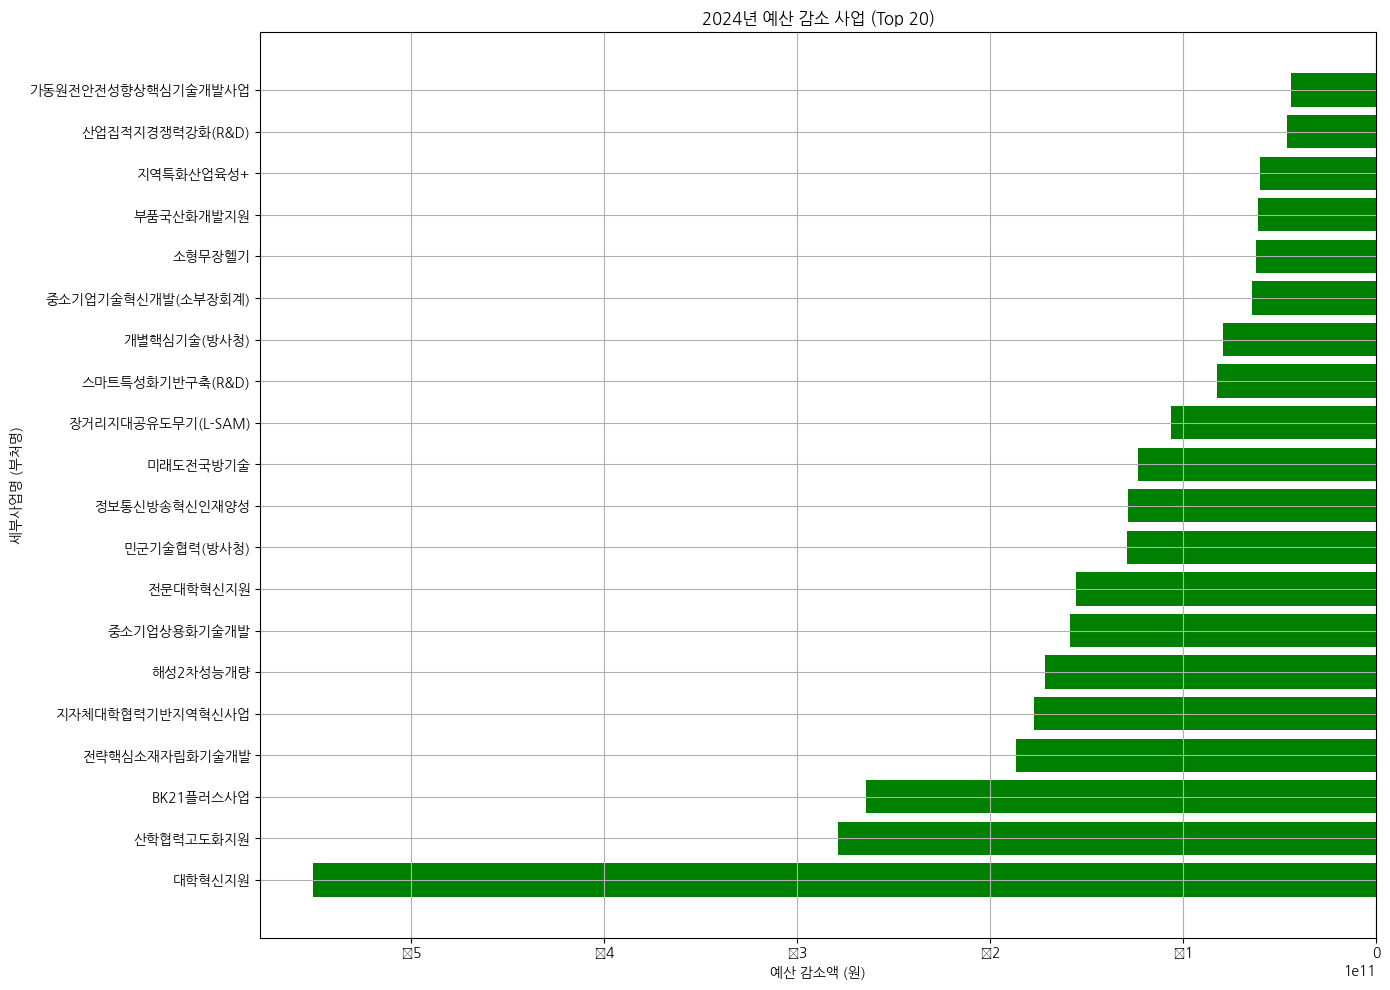

세부사업명      2023년 예산      2024년 예산        예산 감소액
445              대학혁신지원  5.504920e+11  0.000000e+00 -5.504920e+11
676           산학협력고도화지원  2.786235e+11  0.000000e+00 -2.786235e+11
43            BK21플러스사업  2.643450e+11  0.000000e+00 -2.643450e+11
1075      전략핵심소재자립화기술개발  1.864000e+11  0.000000e+00 -1.864000e+11
1201    지자체대학협력기반지역혁신사업  1.770000e+11  0.000000e+00 -1.770000e+11
1480           해성2차성능개량  1.714160e+11  0.000000e+00 -1.714160e+11
1163        중소기업상용화기술개발  2.528700e+11  9.421000e+10 -1.586600e+11
1080           전문대학혁신지원  1.555000e+11  0.000000e+00 -1.555000e+11
543         민군기술협력(방사청)  1.982310e+11  6.914200e+10 -1.290890e+11
1102       정보통신방송혁신인재양성  1.283100e+11  0.000000e+00 -1.283100e+11
513            미래도전국방기술  3.559670e+11  2.326490e+11 -1.233180e+11
1036  장거리지대공유도무기(L-SAM)  2.114550e+11  1.053480e+11 -1.061070e+11
795     스마트특성화기반구축(R&D)  1.526930e+11  7.018700e+10 -8.250600e+10
125         개별핵심기술(방사청)  3.763900e+11  2.973590e+11 -7.903100e+10
1162  중소기업기술혁신개발(소부장회계)  1.046190e+11  4.060400e+10 -6.401500e+10
730              소형무장헬기  6.215400e+10  0.000000e+00 -6.215400e+10
612           부품국산화개발지원  1.847070e+11  1.236690e+11 -6.103800e+10
1192          지역특화산업육성+  1.068860e+11  4.678700e+10 -6.009900e+10
669     산업집적지경쟁력강화(R&D)  6.306500e+10  1.712400e+10 -4.594100e+10
106   가동원전안전성향상핵심기술개발사업  4.410000e+10  0.000000e+00 -4.410000e+10

In [ ]:

# Calculate the budget change from 2023 to 2024 for each project
project_data['국회확정액(단위: 원)'] = pd.to_numeric(project_data['국회확정액(단위: 원)'], errors='coerce')
budget_2023 = project_data[project_data['연도'] == 2023][['세부사업명', '부처명', '국회확정액(단위: 원)']].rename(columns={'국회확정액(단위: 원)': '2023년 예산'})
budget_2024 = project_data[project_data['연도'] == 2024][['세부사업명', '부처명', '국회확정액(단위: 원)']].rename(columns={'국회확정액(단위: 원)': '2024년 예산'})

# Merge the 2023 and 2024 data
merged_budget = pd.merge(budget_2023, budget_2024, on='세부사업명', how='outer').fillna(0)
merged_budget['예산 감소액'] = merged_budget['2024년 예산'] - merged_budget['2023년 예산']

# Filter projects with reduced budget
reduced_budget_projects = merged_budget[merged_budget['예산 감소액'] < 0]

# Sort by the amount of budget reduction
reduced_budget_projects_sorted = reduced_budget_projects.sort_values(by='예산 감소액')

# Get the top 10 projects with the largest budget reduction
top_20_reduced_projects = reduced_budget_projects_sorted.head(20)

# Plot the budget reduction for the top 10 projects using matplotlib
plt.figure(figsize=(14, 10))
plt.barh(top_20_reduced_projects['세부사업명'], top_20_reduced_projects['예산 감소액'], color='green')
plt.xlabel('예산 감소액 (원)')
plt.ylabel('세부사업명 (부처명)')
plt.title('2024년 예산 감소 사업 (Top 20)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the top reduced projects with the reduction amount and department name


 > 예산 감소액이 큰 순으로 세부사업명에대한 바차트


* 아예 소멸된 사업은 대학혁신사업, 산학협력고도화 사업, BK21플러스 사업이며, 소형무장헬기 사업임.

    - 전략핵심소재자립화기술개발사업 : 주요국 수입 의존 편중에 기인한 소부장 산업 이슈로, 반도체/디스플레이, 자동차, 전자전기, 기초화학, 기예금속 분야에대한 국가 주력의 핵심소재기술 확보를 위한 산기평 사업(~2025)

    - 대학혁신사업: 첨단분야부처 협업 혁신인재양성(2024 종료사업)

    - BK21: 우수한 연구인력 양성을 위한 석사 박사 과정, 신진연구인력(첨단과학기술 분야 핵심인력) 집중 지원 지원 사업

    
* 예산 감소가 큰 상위 20개 사업들은 주로 교육,  국방, 중소기업 연구개발 지원 분야에 집중되어 있음



In [ ]:
top_20_reduced_projects[['세부사업명', '2023년 예산', '2024년 예산', '예산 감소액']]


중국의 전체 R&D투자액
-  꾸준한 증가 추세

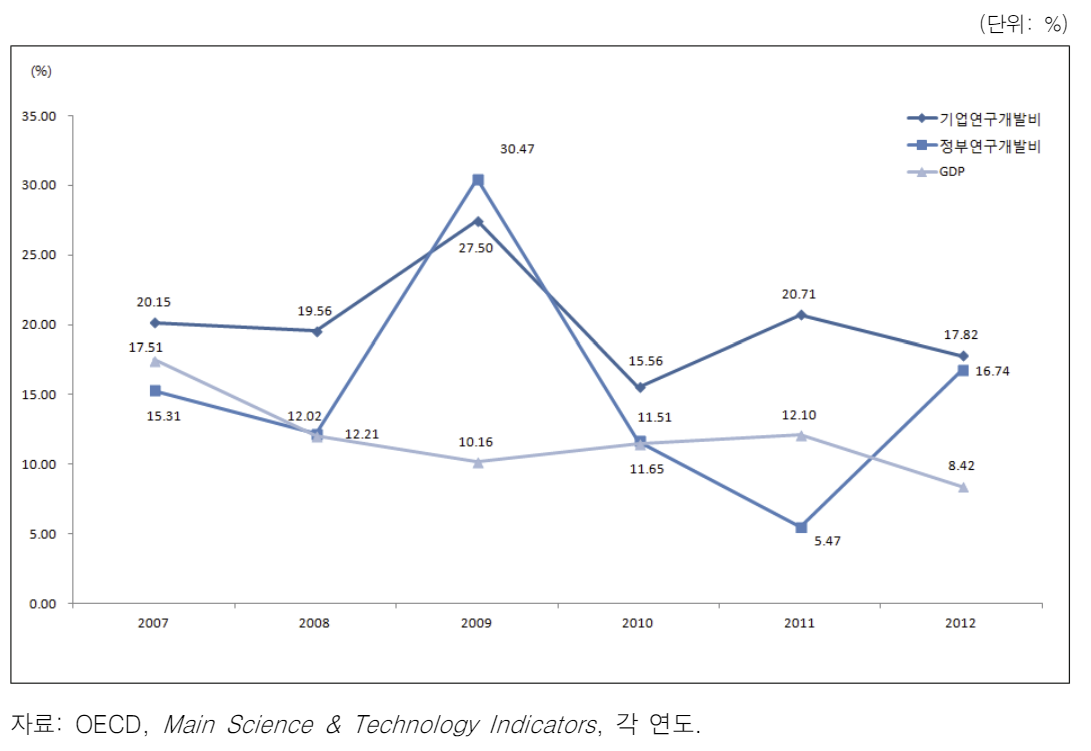

* 글로벌 경제위기가
있었던 시기에도 정부와 민간의 연구개발비는 급속히 증가
* 중국은 세계 경제위기를 R&D와 혁신을 통한 경쟁력 강화의 기회로 삼음

## 5. 결론_연구개발비 감액의 경제적 영향

* 코로나19 시기 연구개발 예산 편성 및 경제성장률에 미친 영향
 - 코로나19가 본격화된 2020년 이후에도 연구개발 예산은 지속적으로 증가해왔음.
 - 이는 팬데믹 상황에서도 연구개발에 대한 투자가 계속 중요하게 다뤄졌음

* 경제성장률에 미친 영향
    - 연구개발 예산의 증가는 경제 성장에 긍정적인 영향을 미칠 수 있음
    - 기술 혁신, 산업 경쟁력 강화, 일자리 창출 등 여러 측면에서 경제 회복과 성장을 촉진하는 역할을 함.

    - **기술 혁신 저하**:연구개발(R&D) 투자가 줄어들면 기술 혁신의 속도가 느려질 수 있습니다. 이는 장기적으로 국가의 경쟁력 약화로 이어질 수 있습니다.

    - **산업 발전 저해**:R&D 투자는 새로운 제품과 서비스를 개발하는 데 필수적입니다. 예산 감소는 이러한 개발을 방해하여 산업 전반의 성장과 발전을 저해할 수 있음.

    - **일자리 감소:**R&D 분야는 많은 고급 일자리를 창출합니다. 예산 감액은 각 사업 분야의 일자리 감소로 이어질 수 있음.

    - **국제 경쟁력 약화:**글로벌 시장에서 경쟁력 있는 기술과 제품을 개발하는 데 있어 뒤처질 위험이 있습니다. 이는 수출 감소와 무역 적자로 이어질 수 있습니다.

    - **경제 성장 둔화:**R&D 투자는 경제 성장을 촉진하는 중요한 요소입니다. 예산 감액은 경제 성장률을 둔화시킬 수 있습니다.

* 결론
    - 연구개발비 예산의 감액은 국가 경제 회복에 부정적인 영향을 미칠 수 있음
    - 과학기술 혁신역량이 줄어드는 문제 야기
    - 이는 경제회복이 아닌 더 큰 경제설장을 늦추게되는 요인이 될 수 있음.
    - 따라서, 이를 최소화하기 위해 R&D 투자의 중요성을 인식하고, 가능한 한 예산을 유지하거나 증액하는 방안이 필요
